# Parte 1: Carga de Datos
este código proporciona los datos necesarios para comenzar a trabajar en un proyecto de aprendizaje automático utilizando conjuntos de datos de entrenamiento y prueba almacenados en archivos CSV.

In [246]:
import pandas as pd

# Cargar los datos
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Identificación de datos faltantes
missing_values_train = df_train.isnull().sum()
missing_values_test = df_test.isnull().sum()

print("Datos faltantes en el conjunto de entrenamiento:")
print(missing_values_train[missing_values_train > 0])

print("\nDatos faltantes en el conjunto de prueba:")
print(missing_values_test[missing_values_test > 0])


Datos faltantes en el conjunto de entrenamiento:
Series([], dtype: int64)

Datos faltantes en el conjunto de prueba:
Series([], dtype: int64)


In [247]:
# Identificación de datos atípicos en columnas numéricas
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

outliers_train = {}
outliers_test = {}

for column in numeric_columns:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers_train[column] = df_train[(df_train[column] < Q1 - 1.5 * IQR) | (df_train[column] > Q3 + 1.5 * IQR)].shape[0]
    outliers_test[column] = df_test[(df_test[column] < Q1 - 1.5 * IQR) | (df_test[column] > Q3 + 1.5 * IQR)].shape[0] if column != 'y' else None

print("\nDatos atípicos en el conjunto de entrenamiento:")
print(outliers_train)

print("\nDatos atípicos en el conjunto de prueba:")
print(outliers_test)



Datos atípicos en el conjunto de entrenamiento:
{'age': 469, 'duration': 2963, 'campaign': 2406, 'pdays': 1515, 'previous': 5625, 'emp_var_rate': 0, 'cons_price_idx': 0, 'cons_conf_idx': 447, 'euribor3m': 0, 'nr_employed': 0, 'y': 4640}

Datos atípicos en el conjunto de prueba:
{'age': 39, 'duration': 286, 'campaign': 235, 'pdays': 160, 'previous': 596, 'emp_var_rate': 0, 'cons_price_idx': 0, 'cons_conf_idx': 43, 'euribor3m': 0, 'nr_employed': 0, 'y': None}


In [248]:
# Resumen estadístico para todas las columnas numéricas
numeric_summary_train = df_train.describe()
numeric_summary_test = df_test.describe()

print("\nResumen estadístico para el conjunto de entrenamiento:")
print(numeric_summary_train)

print("\nResumen estadístico para el conjunto de prueba:")
print(numeric_summary_test)



Resumen estadístico para el conjunto de entrenamiento:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840  

In [249]:
df_test.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   may         fri       487         2    999         0   
1  telephone   may         fri       346         4    999         0   
2  telephone   jun         wed       227         1    999         0   
3  telephone   jun         fri        17         3    999         0   
4   cellular   nov         mon        58         1    999         0   

      poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0  nonexistent          -1.8          92.893          -46.2      1.313   
1  nonexistent           1.1          93.994          -36.4      4.855   
2  nonexistent           1.4          94.465          -41.8      4.962   
3  nonexistent           1.4          94.465          -41.8      4.959   
4  nonexistent          -0.1          93.200          -42.0      4.191   

   nr_employed  
0       5099.1  
1       5191.0  
2       5228.1  
3       5228.1  
4       5195.8

In [250]:
df_train.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

### Matriz de correlación:

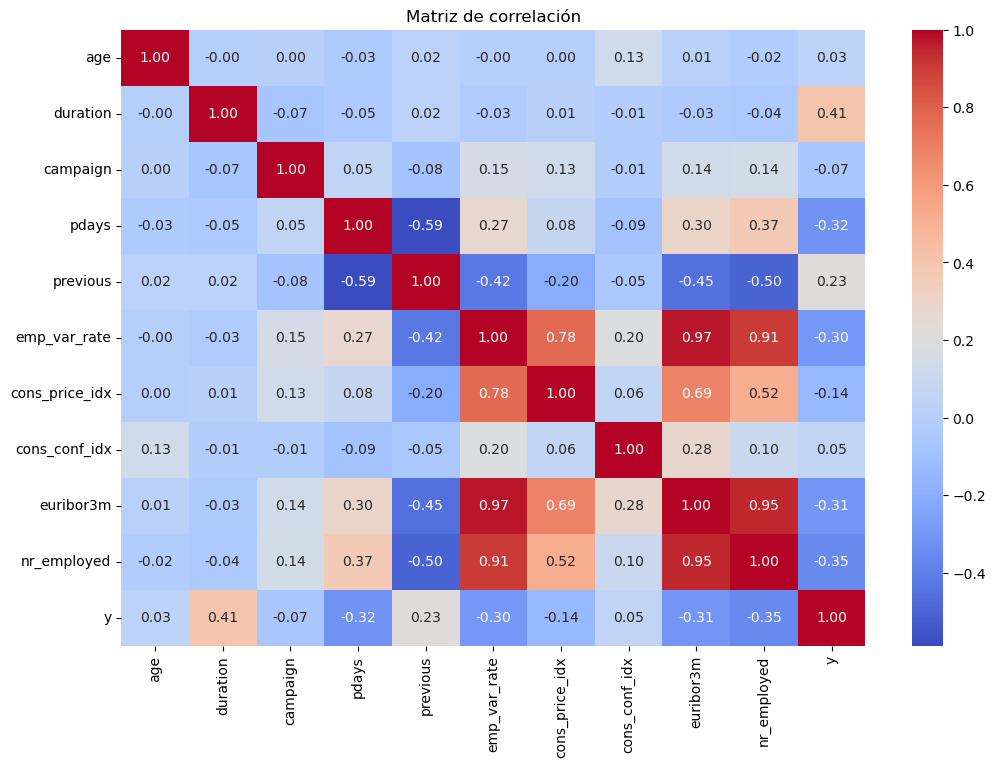

In [251]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_train.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


### Diagramas de dispersión

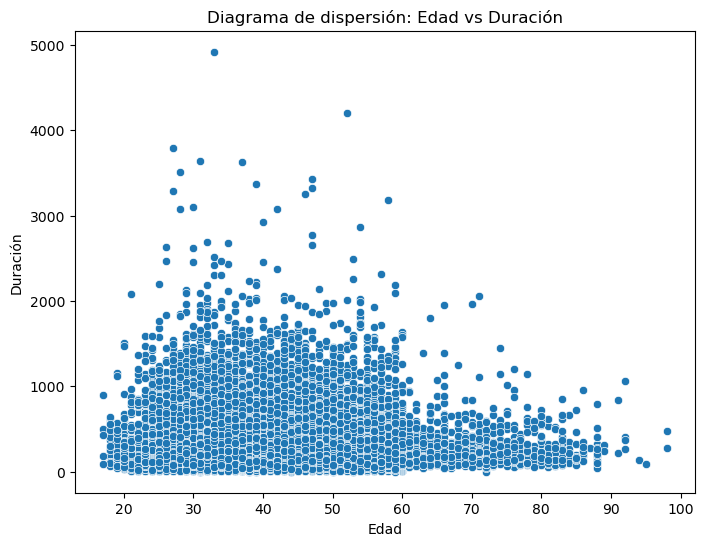

In [252]:
# Diagrama de dispersión para dos variables específicas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='age', y='duration')
plt.title("Diagrama de dispersión: Edad vs Duración")
plt.xlabel("Edad")
plt.ylabel("Duración")
plt.show()


## Gráficos de caja:

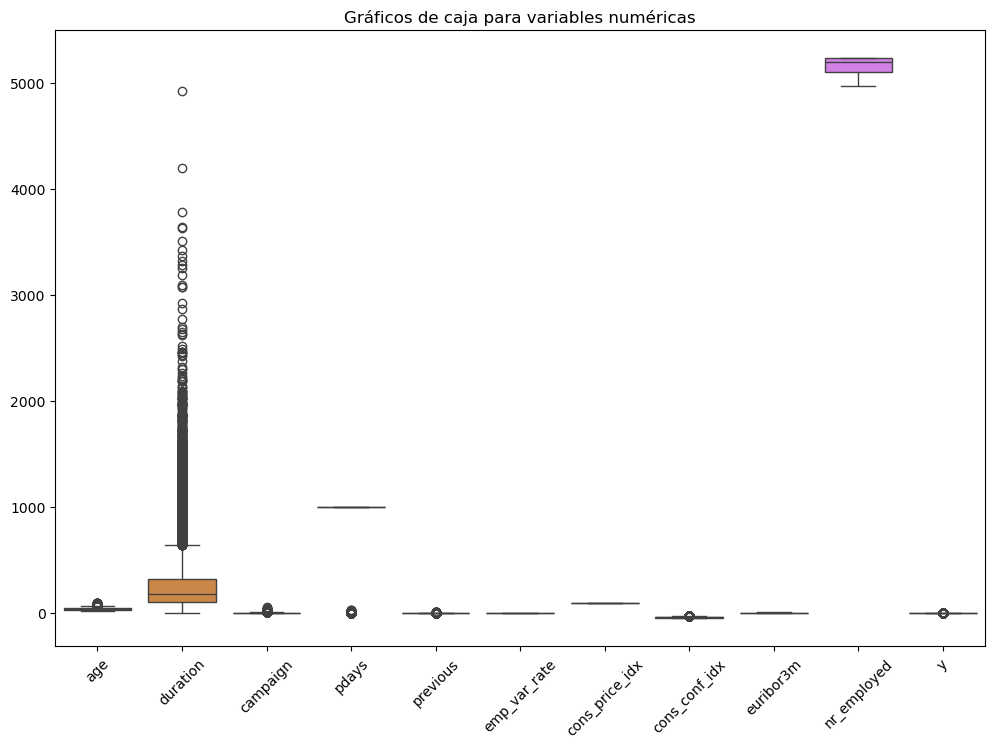

In [253]:
# Gráficos de caja para cada columna numérica
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train.select_dtypes(include=['int64', 'float64']))
plt.title("Gráficos de caja para variables numéricas")
plt.xticks(rotation=45)
plt.show()


## Histogramas para cada columna numérica

<Figure size 1200x800 with 0 Axes>

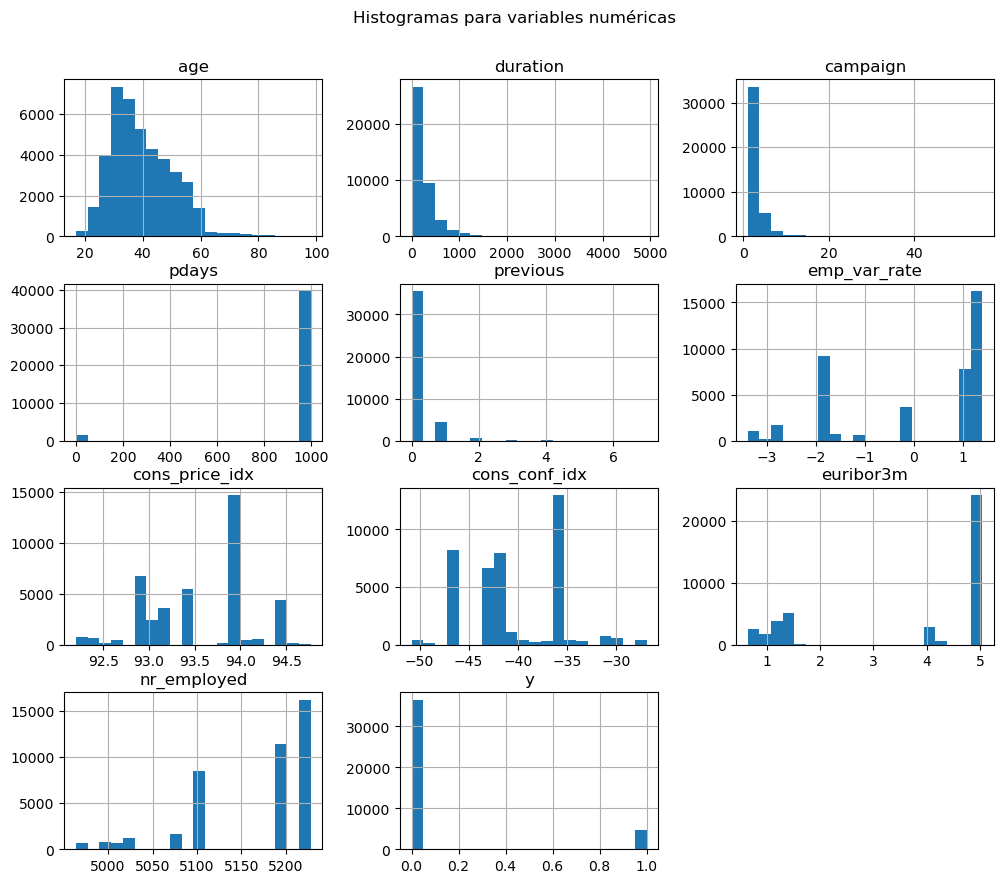

In [254]:
# Histogramas para cada columna numérica
plt.figure(figsize=(12, 8))
df_train.select_dtypes(include=['int64', 'float64']).hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogramas para variables numéricas", y=0.95)
plt.show()


# Parte 2: Preprocesamiento de Datos

In [255]:
print(available_columns)


Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of

In [256]:
import pandas as pd

# Identificación de datos atípicos en columnas numéricas
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

outliers_train = {}
outliers_test = {}

for column in numeric_columns:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar y contar valores atípicos en el conjunto de entrenamiento
    outliers_train[column] = df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)].shape[0]
    
    # Identificar y contar valores atípicos en el conjunto de prueba
    if column != 'y':
        outliers_test[column] = df_test[(df_test[column] < lower_bound) | (df_test[column] > upper_bound)].shape[0]

print("\nDatos atípicos en el conjunto de entrenamiento:")
print(outliers_train)

print("\nDatos atípicos en el conjunto de prueba:")
print(outliers_test)



Datos atípicos en el conjunto de entrenamiento:
{'age': 469, 'duration': 2963, 'campaign': 2406, 'pdays': 1515, 'previous': 5625, 'emp_var_rate': 0, 'cons_price_idx': 0, 'cons_conf_idx': 447, 'euribor3m': 0, 'nr_employed': 0, 'y': 4640}

Datos atípicos en el conjunto de prueba:
{'age': 39, 'duration': 286, 'campaign': 235, 'pdays': 160, 'previous': 596, 'emp_var_rate': 0, 'cons_price_idx': 0, 'cons_conf_idx': 43, 'euribor3m': 0, 'nr_employed': 0}


<Figure size 1200x600 with 0 Axes>

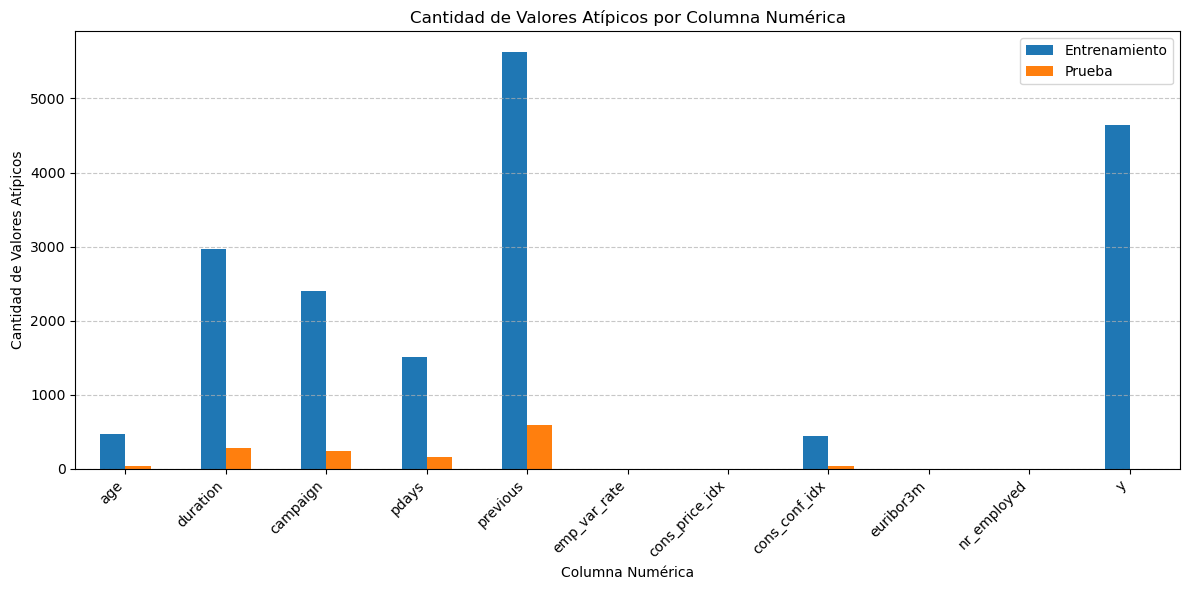

In [257]:
import matplotlib.pyplot as plt

# Convertir los diccionarios de valores atípicos en DataFrames para facilitar la visualización
df_outliers_train = pd.DataFrame.from_dict(outliers_train, orient='index', columns=['Train'])
df_outliers_test = pd.DataFrame.from_dict(outliers_test, orient='index', columns=['Test'])

# Unir los DataFrames para tener una única tabla con valores de entrenamiento y prueba
df_outliers = pd.concat([df_outliers_train, df_outliers_test], axis=1)

# Graficar los valores atípicos
plt.figure(figsize=(12, 6))
df_outliers.plot(kind='bar', figsize=(12, 6))
plt.title('Cantidad de Valores Atípicos por Columna Numérica')
plt.xlabel('Columna Numérica')
plt.ylabel('Cantidad de Valores Atípicos')
plt.xticks(rotation=45, ha='right')
plt.legend(['Entrenamiento', 'Prueba'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [258]:
# Identificación de datos atípicos en columnas numéricas
numeric_columns_train = df_train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns_test = df_test.select_dtypes(include=['int64', 'float64']).columns

# Eliminar los valores atípicos del conjunto de entrenamiento
for column in numeric_columns_train:
    if column != 'y':  # Verificar que no sea la columna 'y'
        Q1 = df_train[column].quantile(0.25)
        Q3 = df_train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_train = df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]

# Eliminar los valores atípicos del conjunto de prueba
for column in numeric_columns_test:
    if column != 'y':  # Verificar que no sea la columna 'y'
        Q1 = df_test[column].quantile(0.25)
        Q3 = df_test[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_test = df_test[(df_test[column] >= lower_bound) & (df_test[column] <= upper_bound)]

# Verificar el resultado
print("Dimensiones del conjunto de entrenamiento después de eliminar valores atípicos:", df_train.shape)
print("Dimensiones del conjunto de prueba después de eliminar valores atípicos:", df_test.shape)



Dimensiones del conjunto de entrenamiento después de eliminar valores atípicos: (23106, 21)
Dimensiones del conjunto de prueba después de eliminar valores atípicos: (2307, 20)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (10,) and arg 3 with shape (11,).

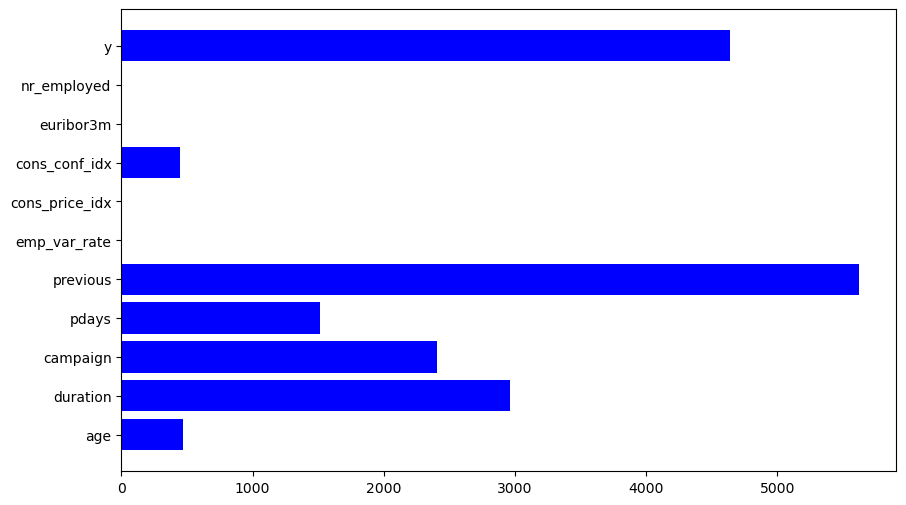

In [259]:
import matplotlib.pyplot as plt

# Crear listas para almacenar los nombres de las columnas y la cantidad de valores atípicos
columns = list(outliers_train.keys())
outliers_counts_train = list(outliers_train.values())
outliers_counts_test = list(outliers_test.values())

# Crear subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la cantidad de valores atípicos para el conjunto de entrenamiento
ax.barh(columns, outliers_counts_train, color='blue', label='Entrenamiento')
# Graficar la cantidad de valores atípicos para el conjunto de prueba
ax.barh(columns, outliers_counts_test, color='orange', label='Prueba')

# Configuraciones adicionales
ax.set_xlabel('Cantidad de Valores Atípicos')
ax.set_ylabel('Columnas')
ax.set_title('Cantidad de Valores Atípicos por Columna Numérica')
ax.legend()

# Mostrar la gráfica
plt.show()


In [260]:
# Eliminar la columna "duration" de los conjuntos de datos
df_trainVEDA = df_train.drop(columns=['duration'])
df_pruebaVEDA = df_test.drop(columns=['duration'])

### Guardar los dataframes preprocesados en archivos CSV

In [261]:
# Guardar los dataframes en archivos .csv
df_trainVEDA.to_csv('df_trainVEDA.csv', index=False)
df_pruebaVEDA.to_csv('df_pruebaVEDA.csv', index=False)


## Carga de Datos 2


In [262]:
import pandas as pd

# Cargar los dataframes desde los archivos CSV
df_trainVEDA = pd.read_csv('df_trainVEDA.csv')
df_pruebaVEDA = pd.read_csv('df_pruebaVEDA.csv')

# Mostrar las primeras filas de cada dataframe para verificar
print("Primeras filas del dataframe df_trainVEDA:")
print(df_trainVEDA.head())

print("\nPrimeras filas del dataframe df_pruebaVEDA:")
print(df_pruebaVEDA.head())


Primeras filas del dataframe df_trainVEDA:
   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   34    housemaid   single  university.degree       no      no   no   
3   55   management  married  university.degree       no      no   no   
4   52     services  married        high.school  unknown     yes   no   

     contact month day_of_week  campaign  pdays  previous     poutcome  \
0   cellular   aug         thu         1    999         0  nonexistent   
1   cellular   nov         fri         1    999         0  nonexistent   
2  telephone   may         fri         2    999         0  nonexistent   
3   cellular   aug         mon         3    999         0  nonexistent   
4   cellular   jul         thu         2    999         0  nonexistent   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y

In [263]:
# Lista de columnas categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Codificar variables categóricas en variables dummy para el conjunto de entrenamiento
df_trainVEDA_encoded = pd.get_dummies(df_trainVEDA, columns=categorical_columns)

# Codificar variables categóricas en variables dummy para el conjunto de prueba
df_pruebaVEDA_encoded = pd.get_dummies(df_pruebaVEDA, columns=categorical_columns)

# Mostrar las primeras filas de los dataframes codificados para verificar
print("Primeras filas del dataframe df_trainVEDA_encoded:")
print(df_trainVEDA_encoded.head())

print("\nPrimeras filas del dataframe df_pruebaVEDA_encoded:")
print(df_pruebaVEDA_encoded.head())


Primeras filas del dataframe df_trainVEDA_encoded:
   age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0   44         1    999         0           1.4          93.444   
1   53         1    999         0          -0.1          93.200   
2   34         2    999         0           1.1          93.994   
3   55         3    999         0           1.4          93.444   
4   52         2    999         0           1.4          93.918   

   cons_conf_idx  euribor3m  nr_employed  y  ...  month_jun  month_may  \
0          -36.1      4.963       5228.1  0  ...      False      False   
1          -42.0      4.021       5195.8  0  ...      False      False   
2          -36.4      4.864       5191.0  0  ...      False       True   
3          -36.1      4.965       5228.1  1  ...      False      False   
4          -42.7      4.962       5228.1  0  ...      False      False   

   month_nov  month_oct  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0      False      False

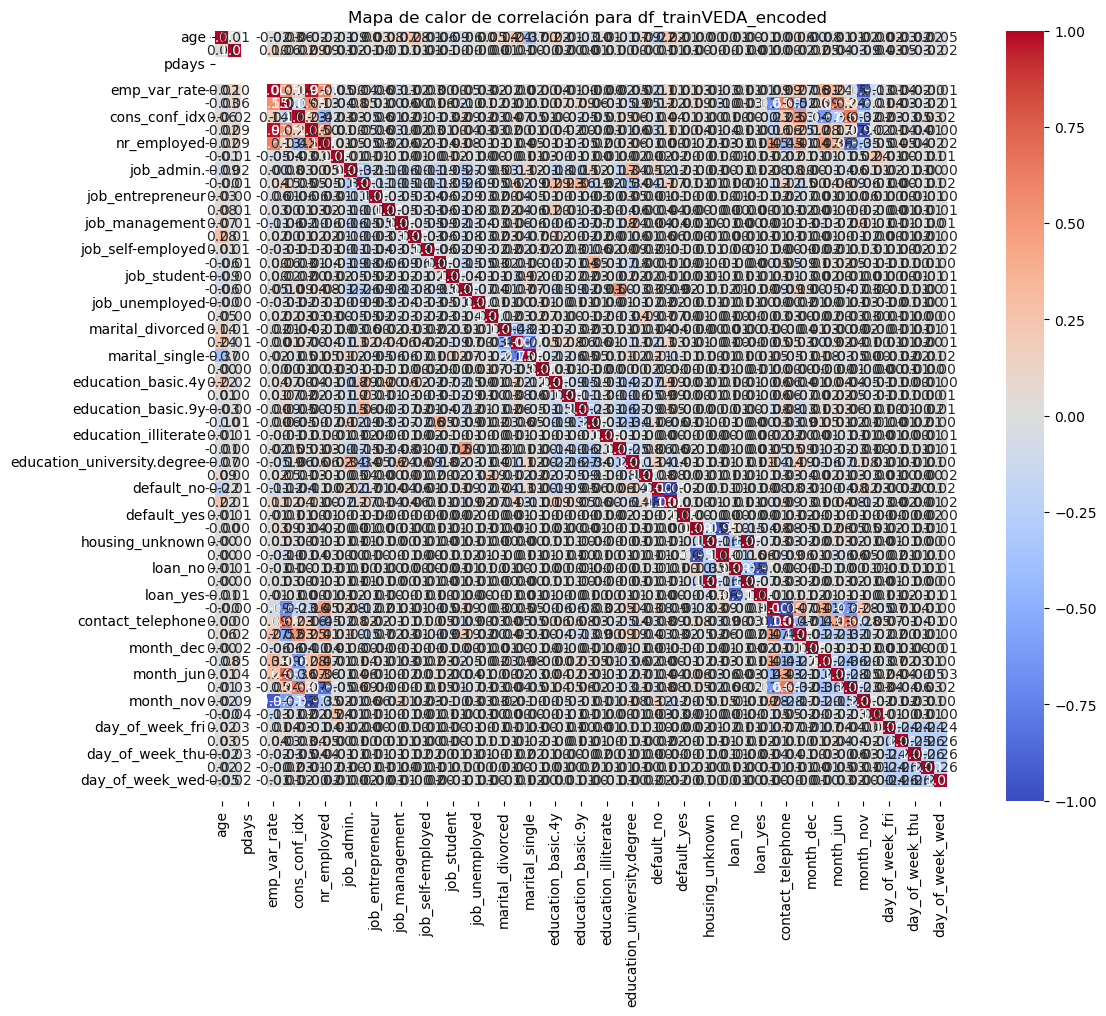

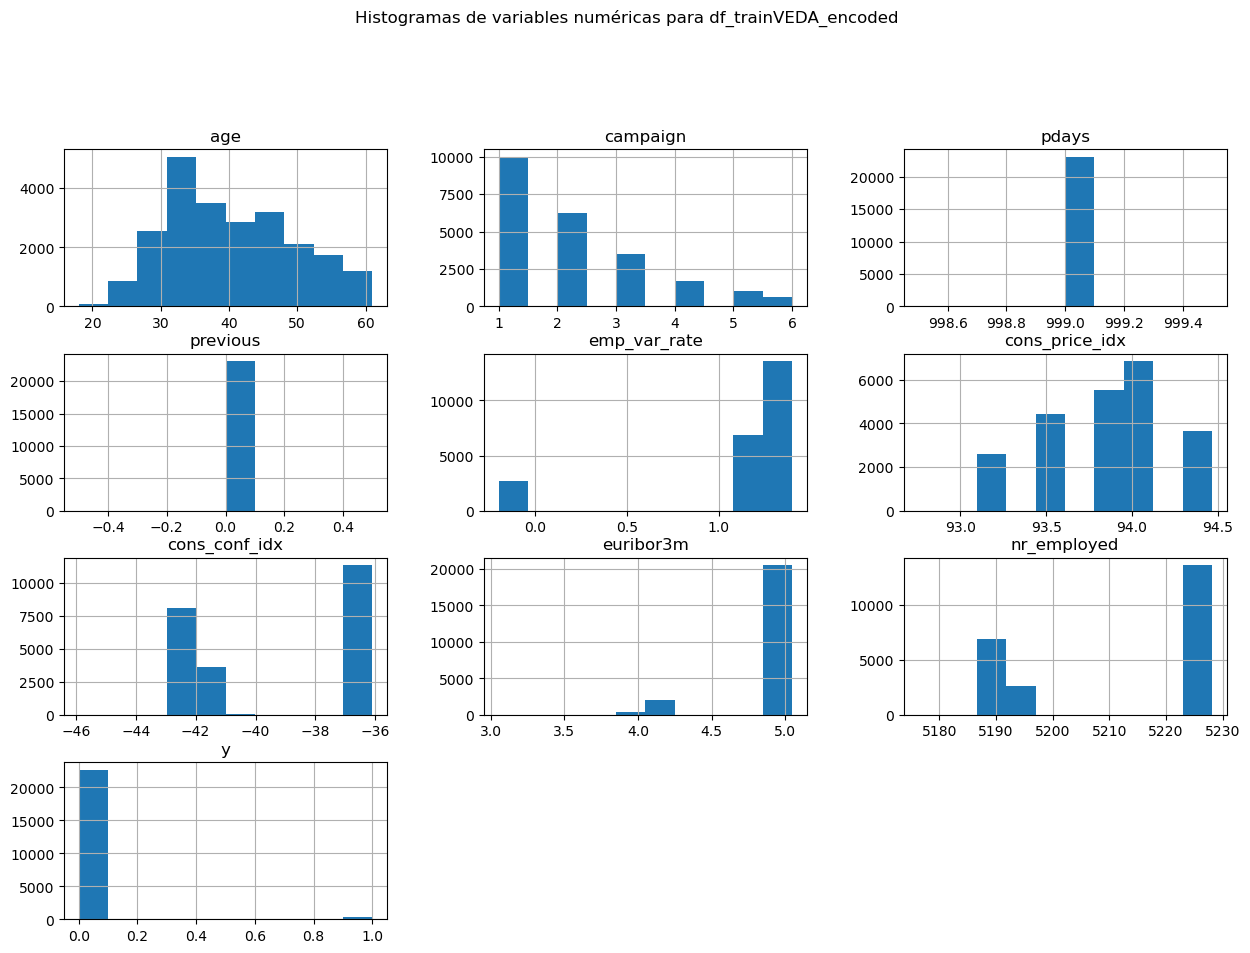

ValueError: Could not interpret value `job` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_trainVEDA_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlación para df_trainVEDA_encoded")
plt.show()

# Histogramas de variables numéricas
numeric_columns = df_trainVEDA_encoded.select_dtypes(include=['int64', 'float64']).columns
df_trainVEDA_encoded[numeric_columns].hist(figsize=(15, 10))
plt.suptitle("Histogramas de variables numéricas para df_trainVEDA_encoded", y=1.02)
plt.show()

# Diagramas de barras para variables categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_trainVEDA_encoded, x=column)
    plt.title(f"Distribución de {column} en df_trainVEDA_encoded")
    plt.xticks(rotation=45)
    plt.show()


Estadísticas descriptivas para df_trainVEDA_encoded:
                age      campaign    pdays  previous  emp_var_rate  \
count  23106.000000  23106.000000  23106.0   23106.0  23106.000000   
mean      40.194711      2.114343    999.0       0.0      1.137094   
std        9.187185      1.310651      0.0       0.0      0.467348   
min       18.000000      1.000000    999.0       0.0     -0.200000   
25%       33.000000      1.000000    999.0       0.0      1.100000   
50%       39.000000      2.000000    999.0       0.0      1.400000   
75%       47.000000      3.000000    999.0       0.0      1.400000   
max       61.000000      6.000000    999.0       0.0      1.400000   

       cons_price_idx  cons_conf_idx     euribor3m   nr_employed             y  
count    23106.000000   23106.000000  23106.000000  23106.000000  23106.000000  
mean        93.853581     -39.331862      4.830529   5213.333892      0.017182  
std          0.383136       3.006125      0.261986     17.668974      0.1

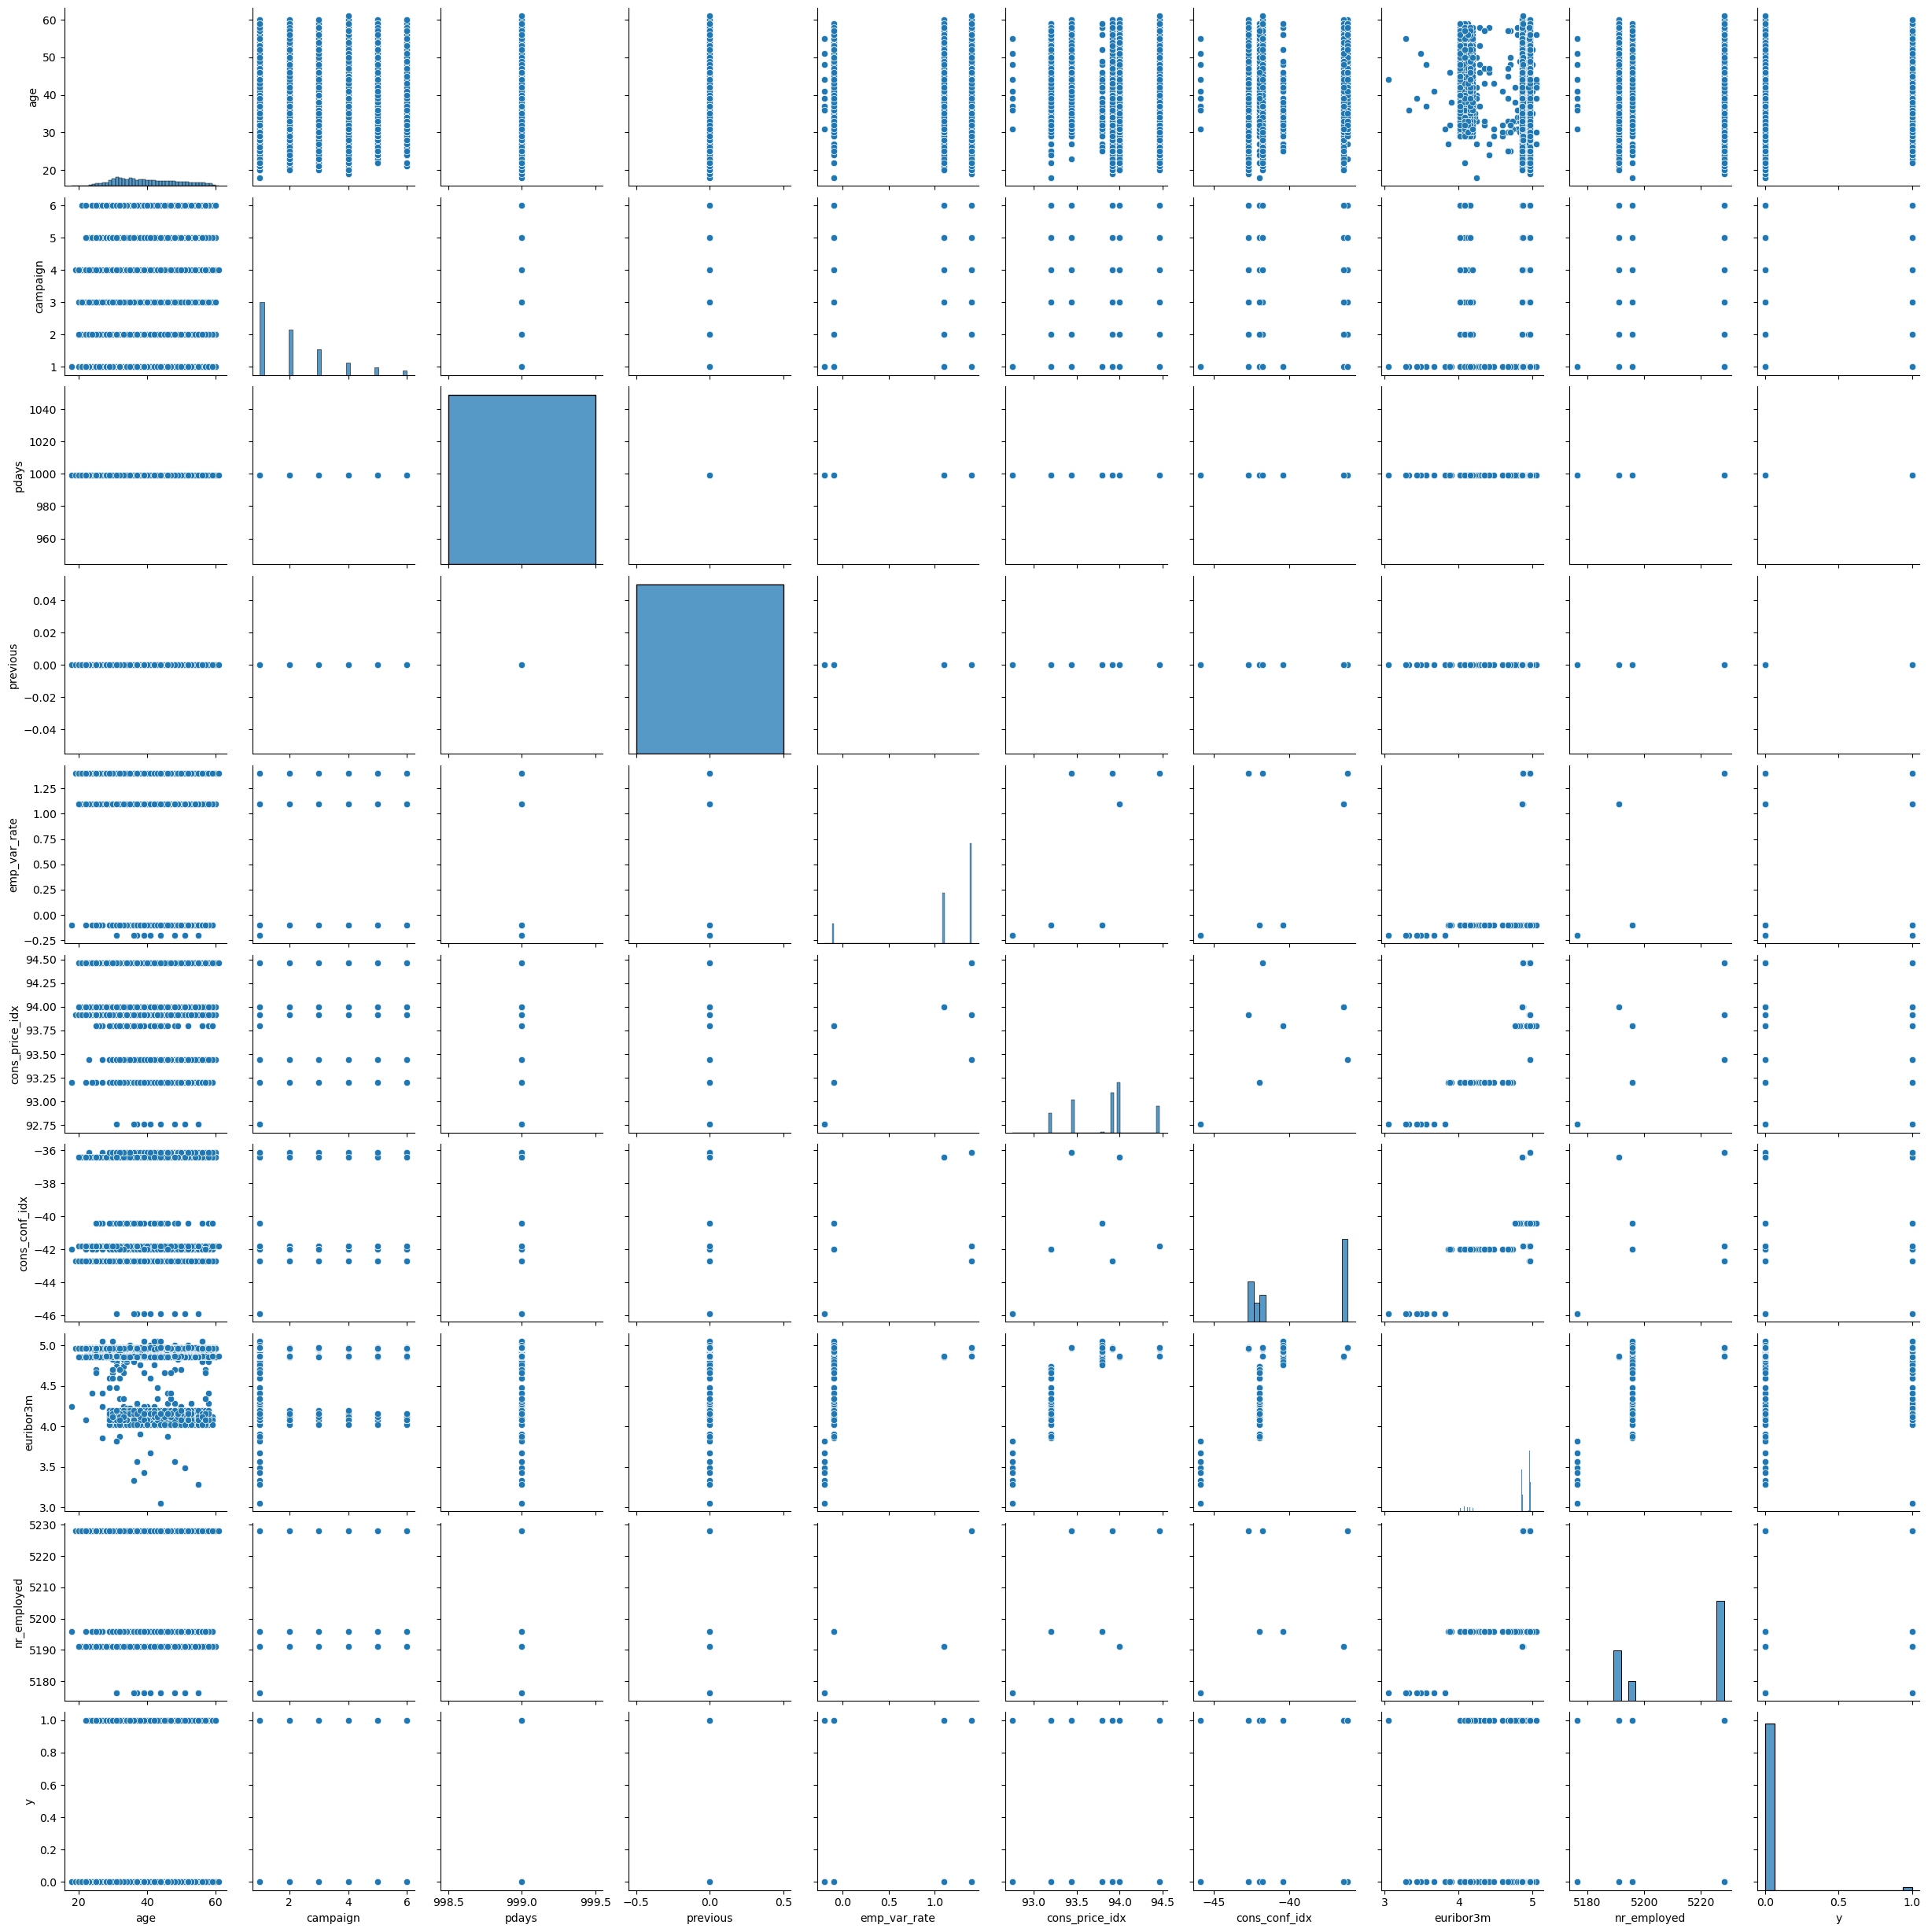

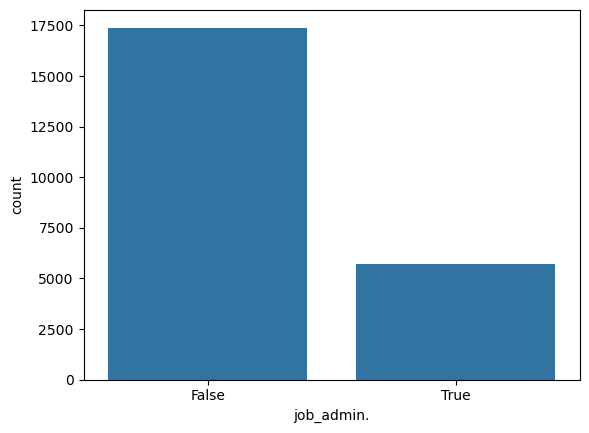

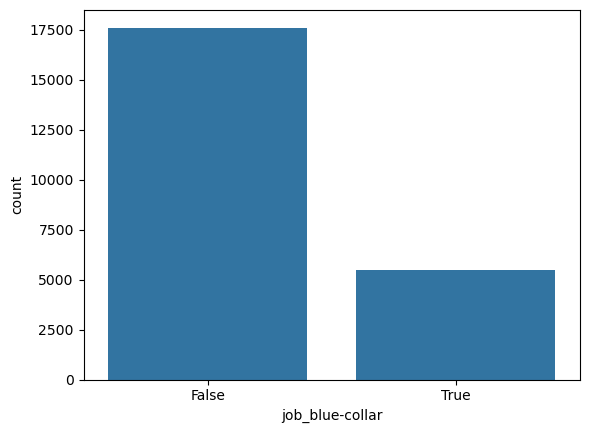

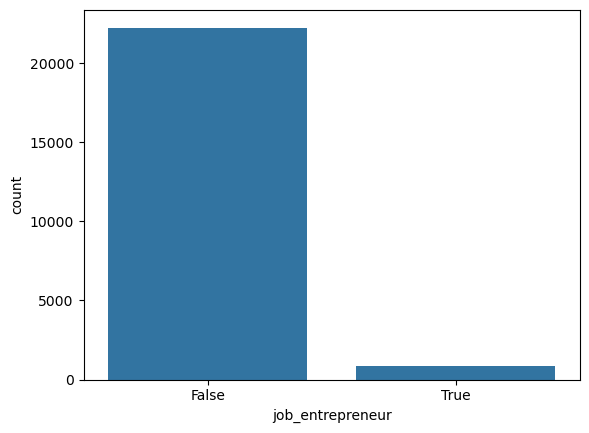

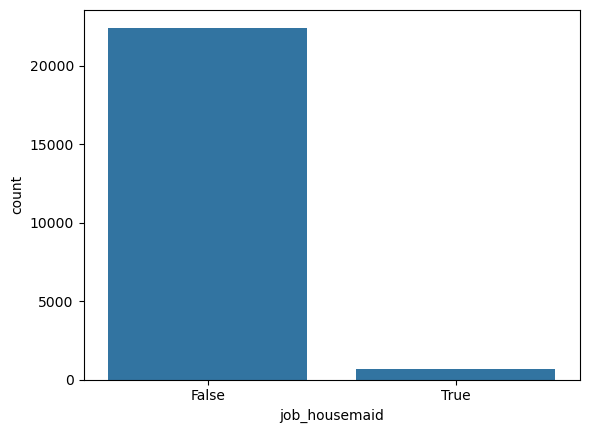

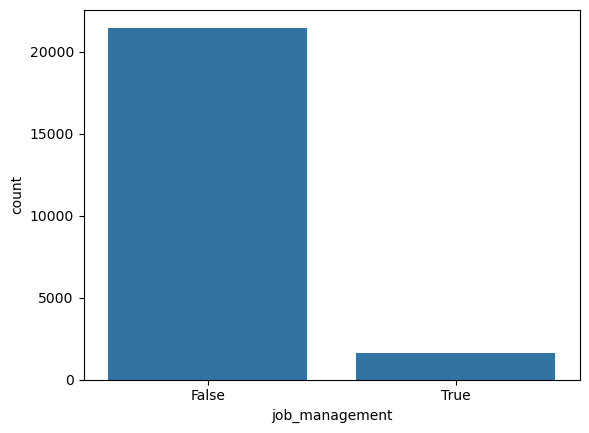

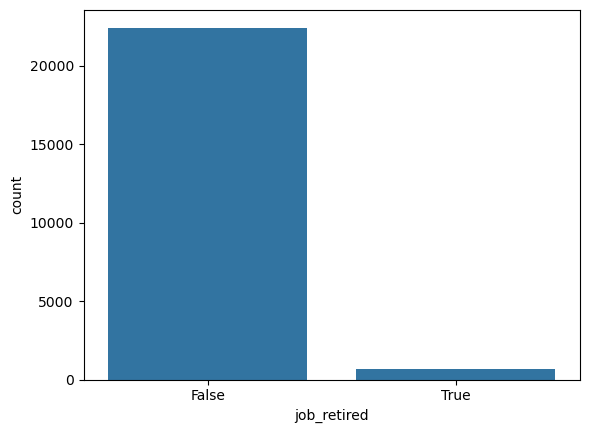

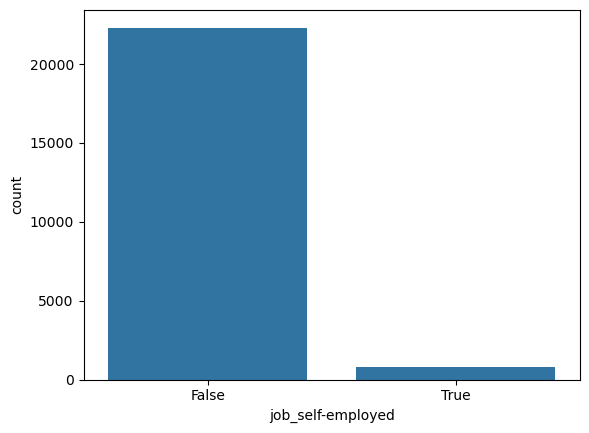

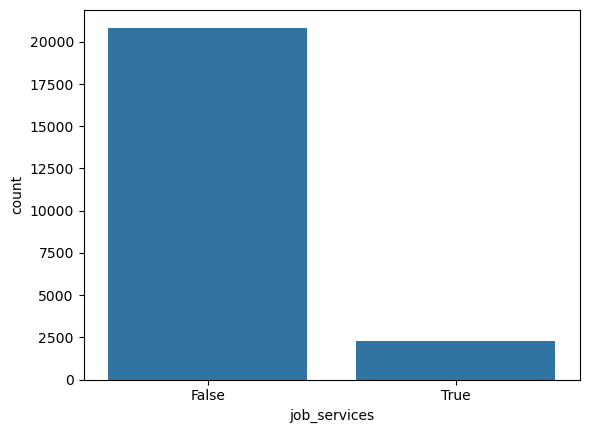

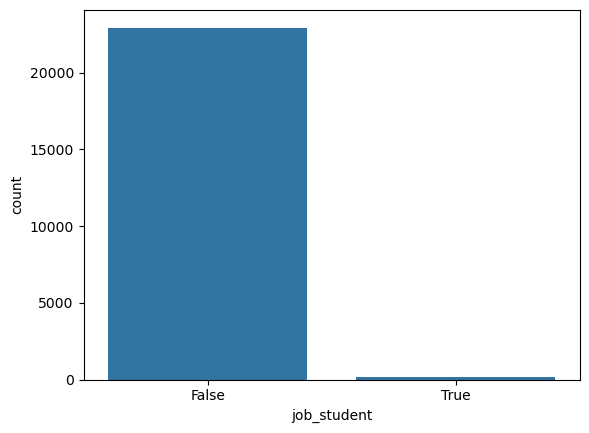

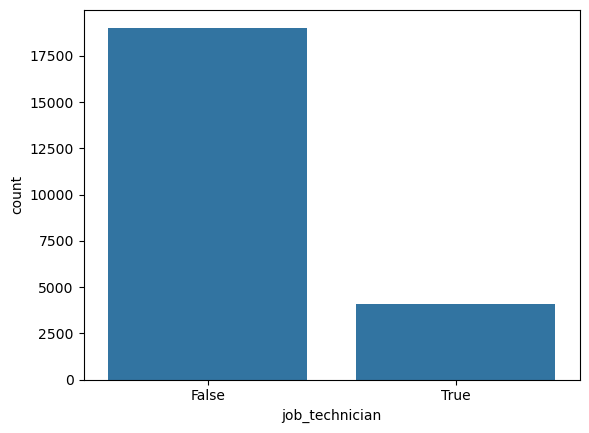

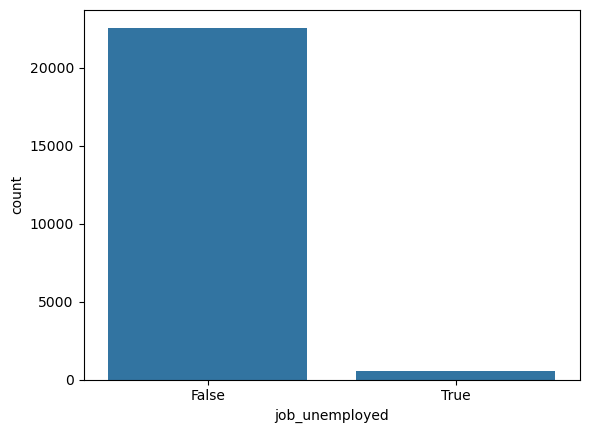

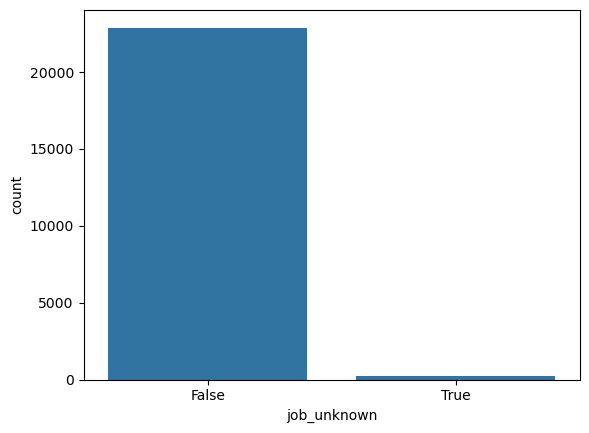

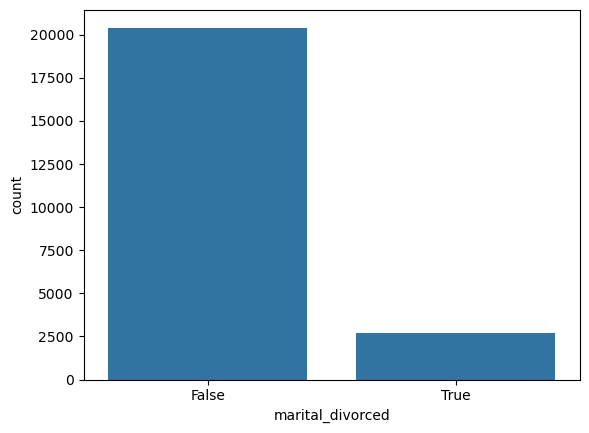

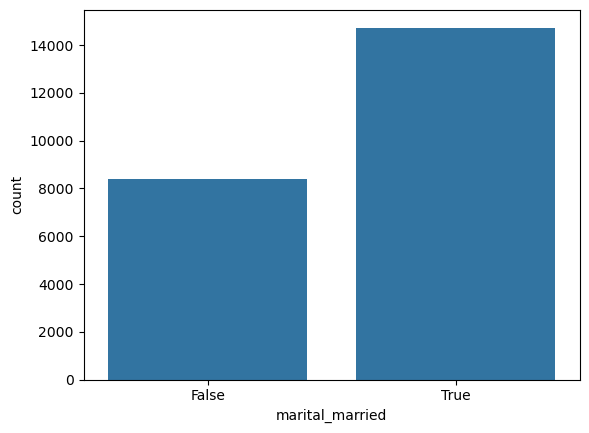

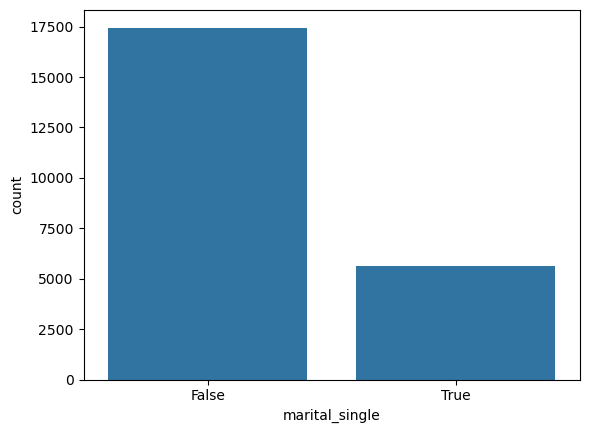

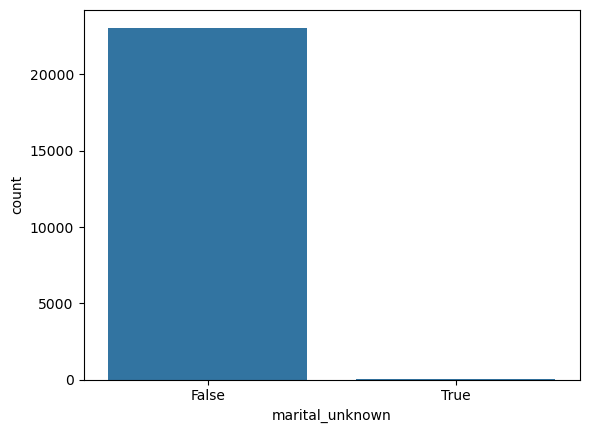

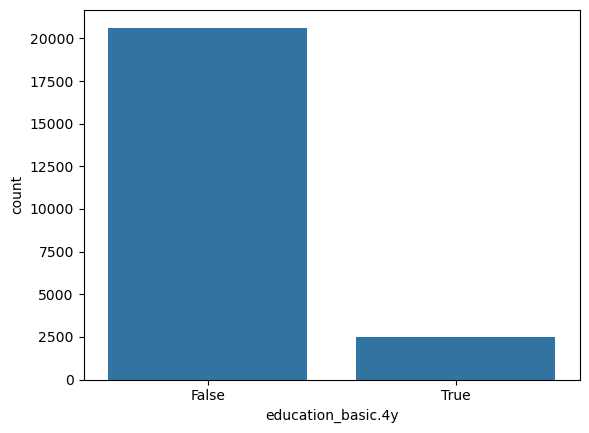

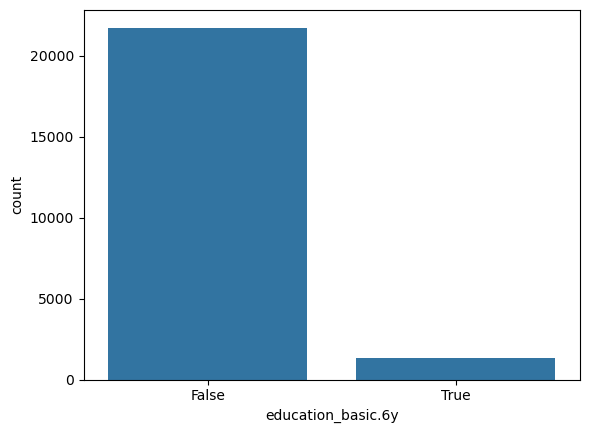

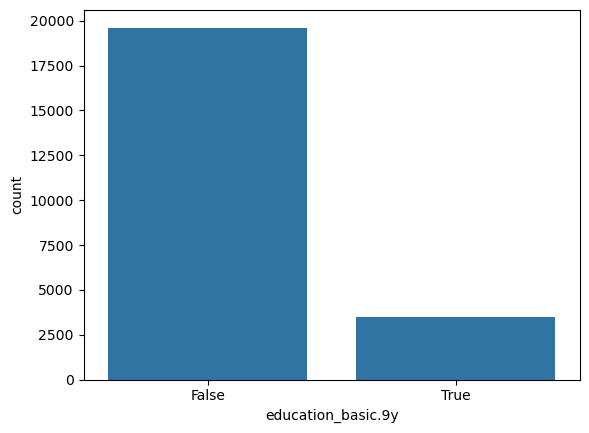

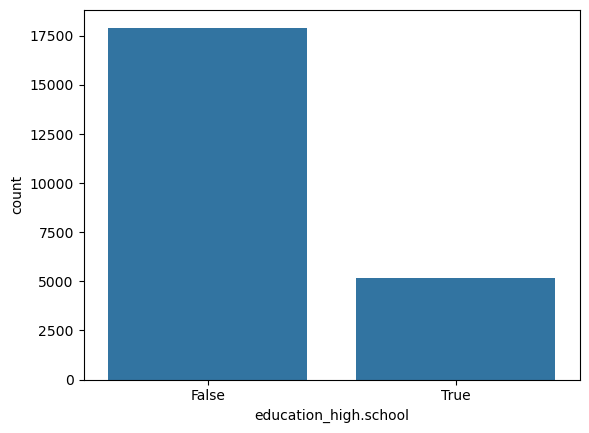

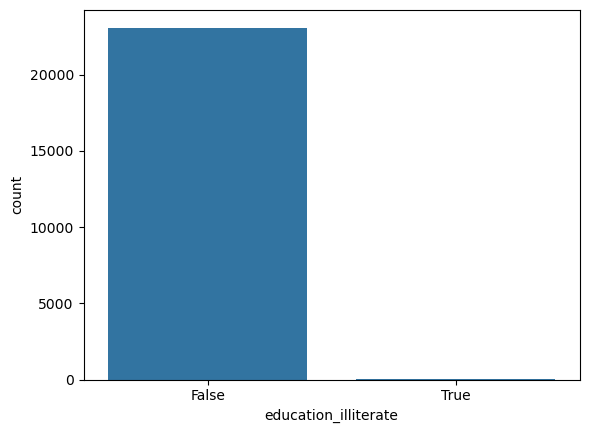

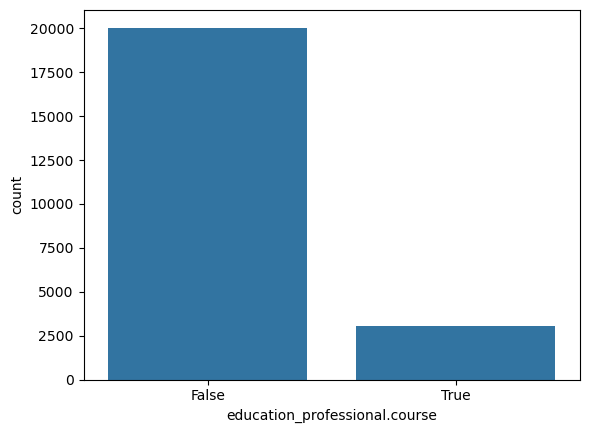

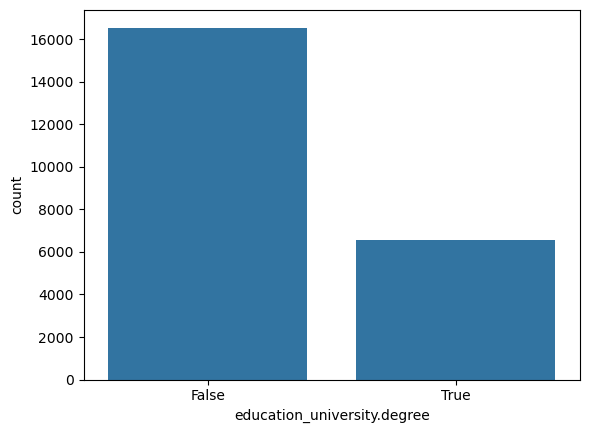

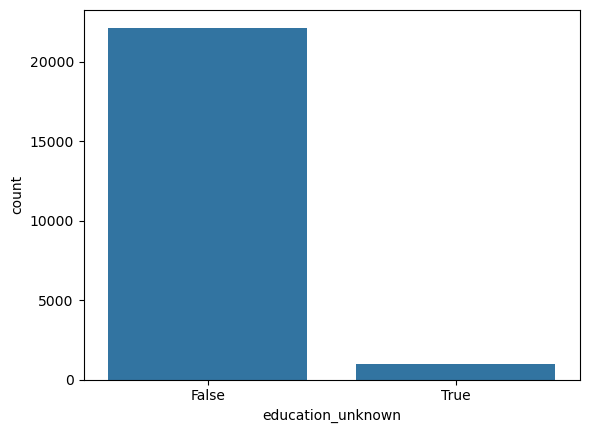

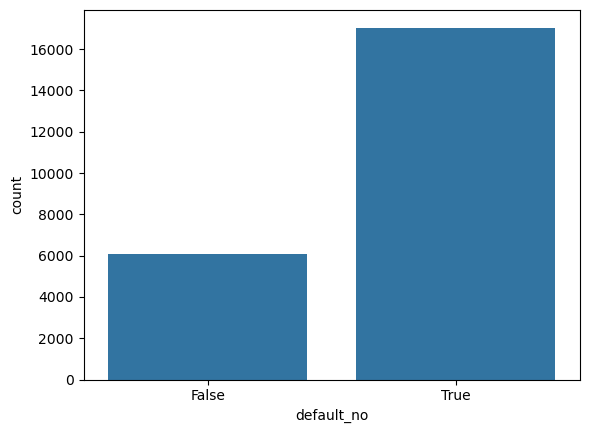

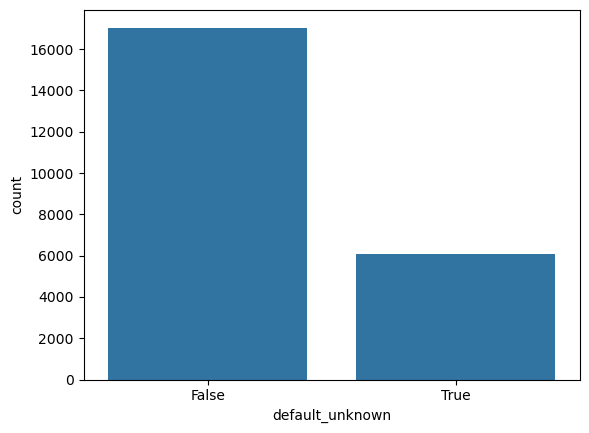

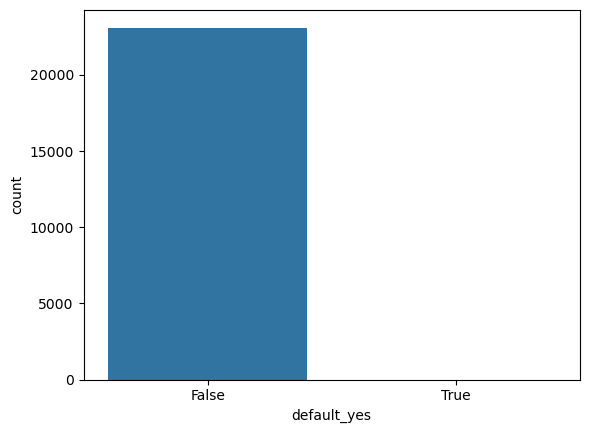

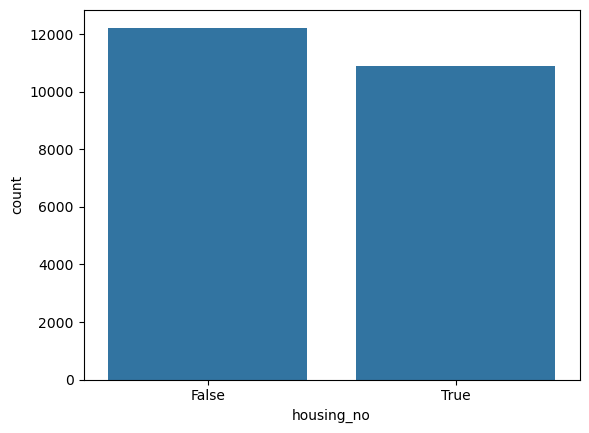

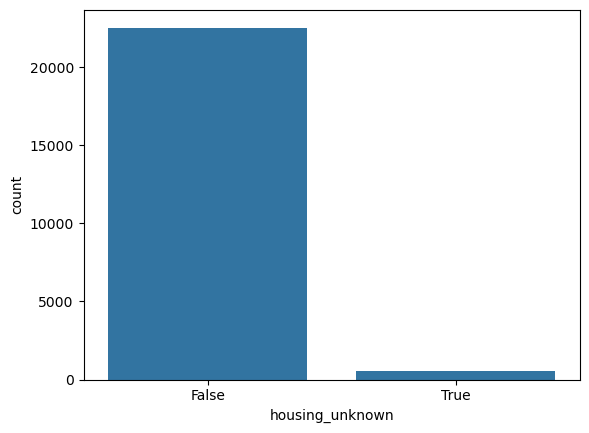

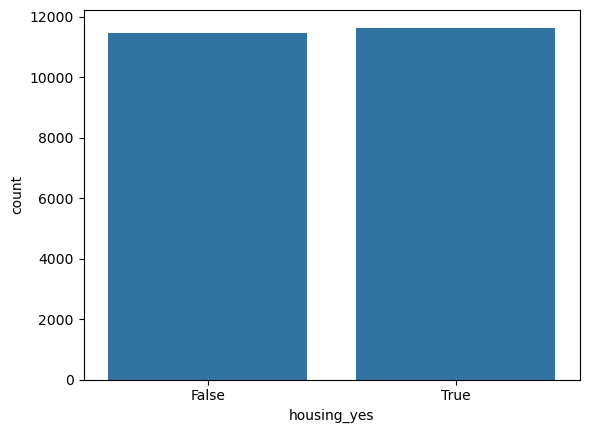

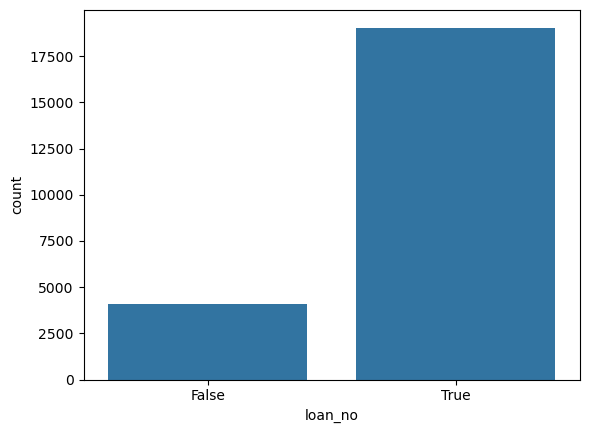

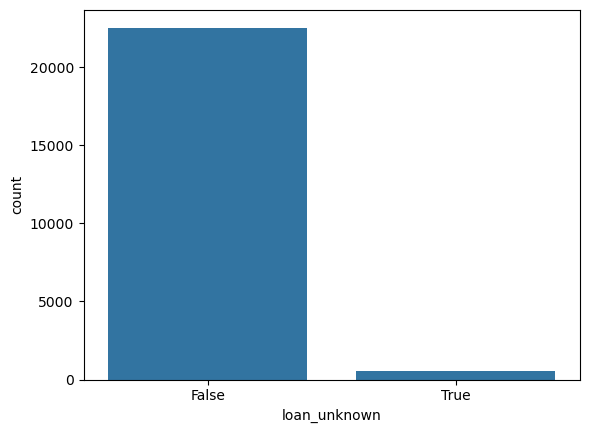

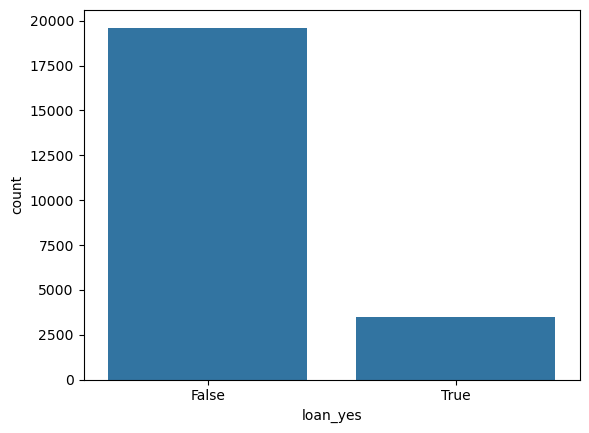

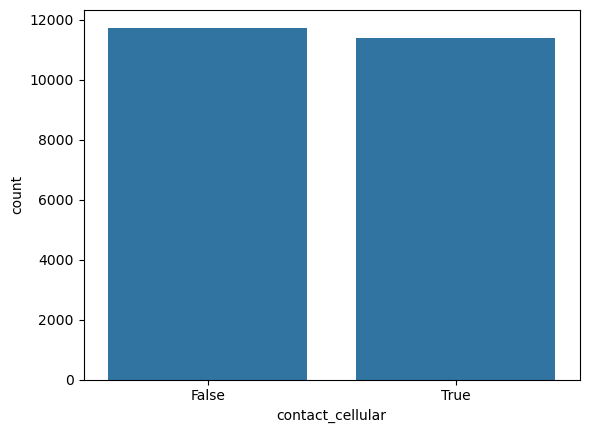

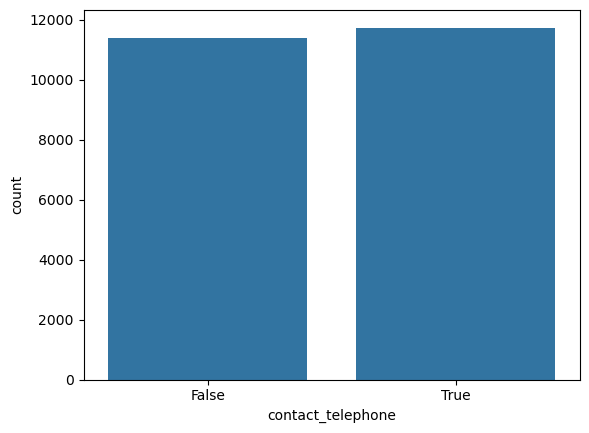

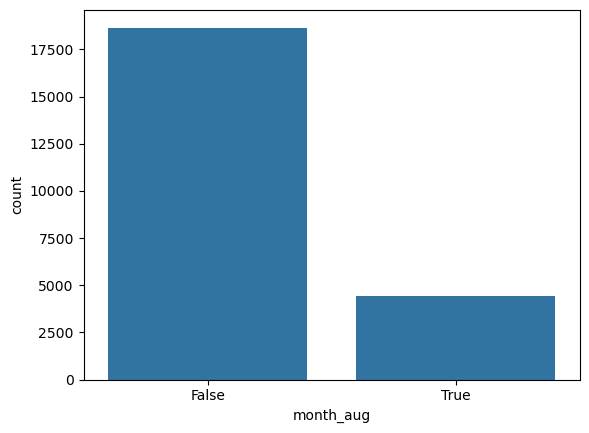

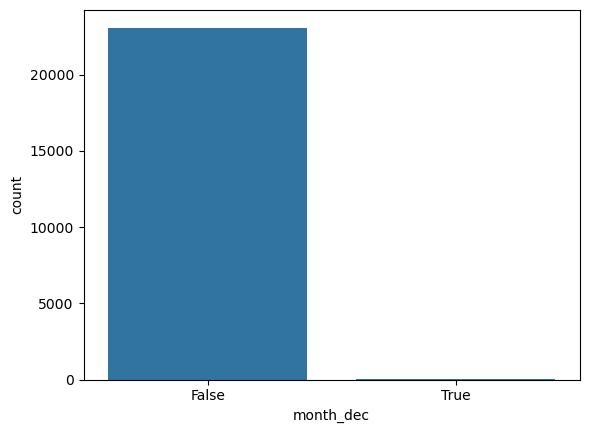

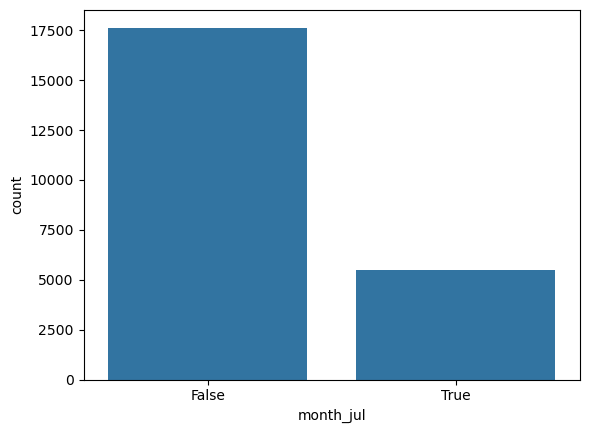

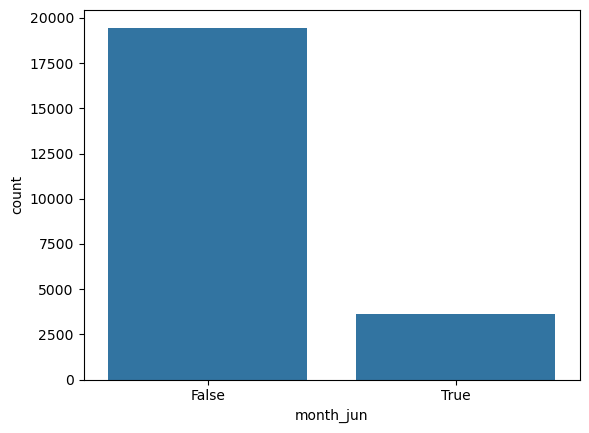

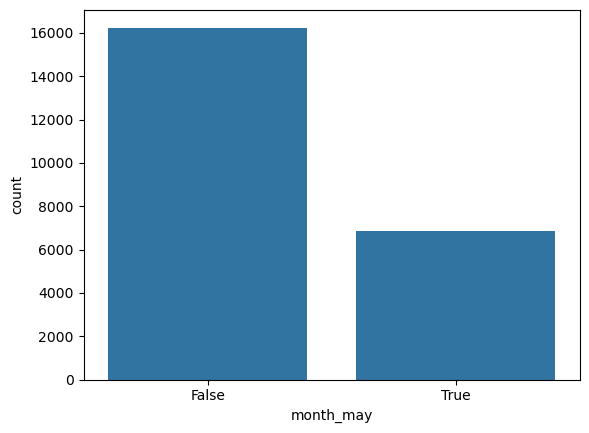

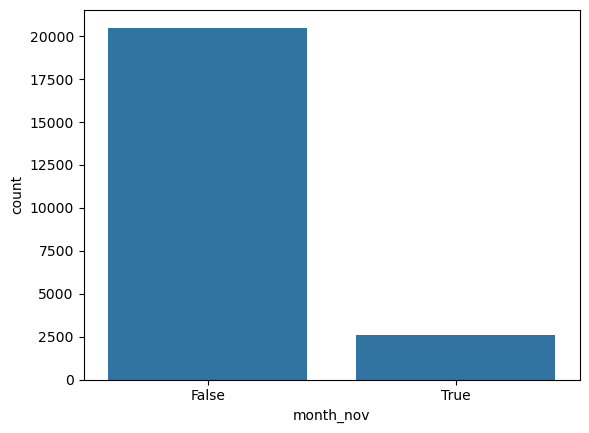

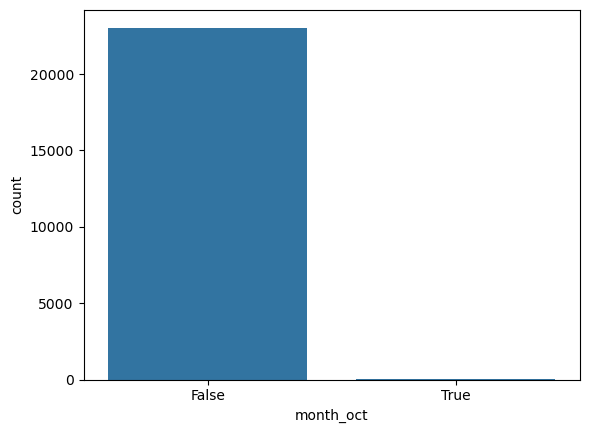

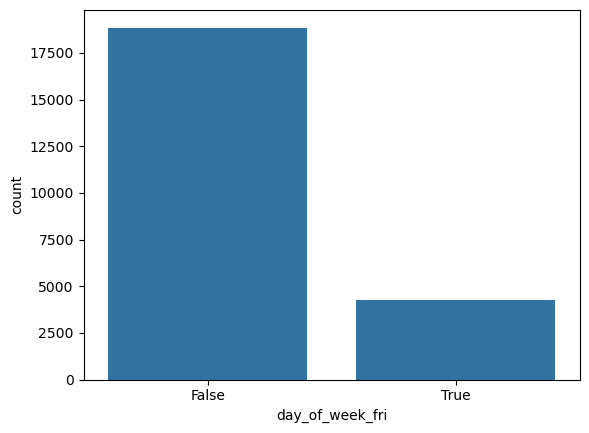

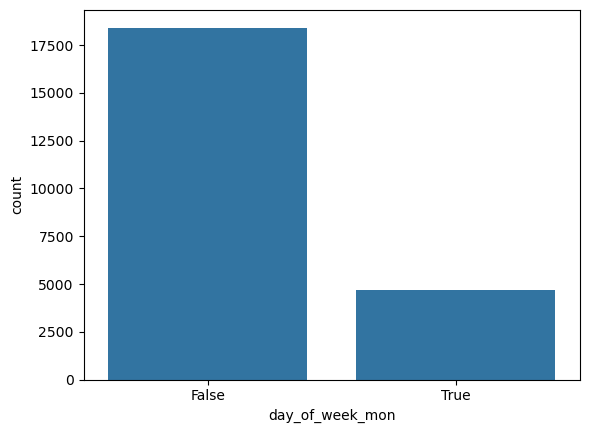

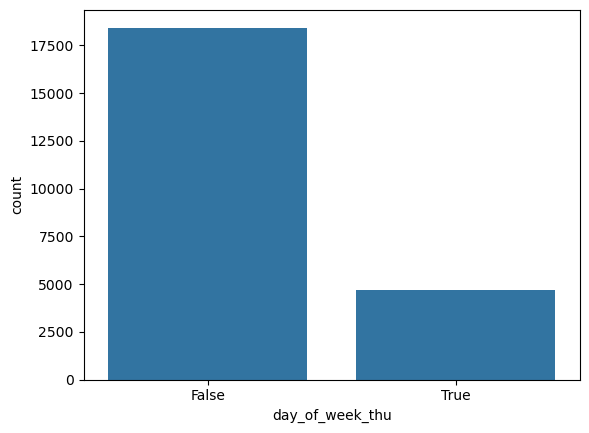

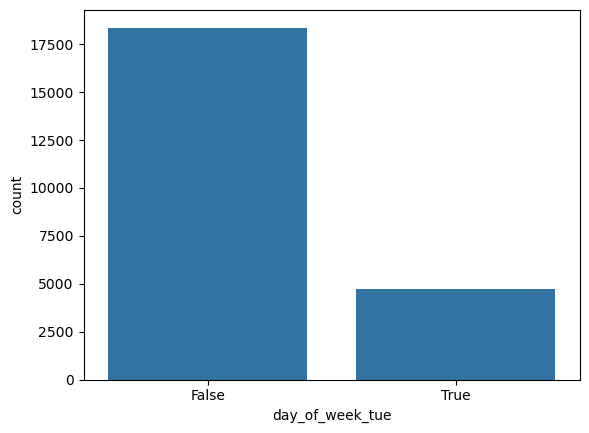

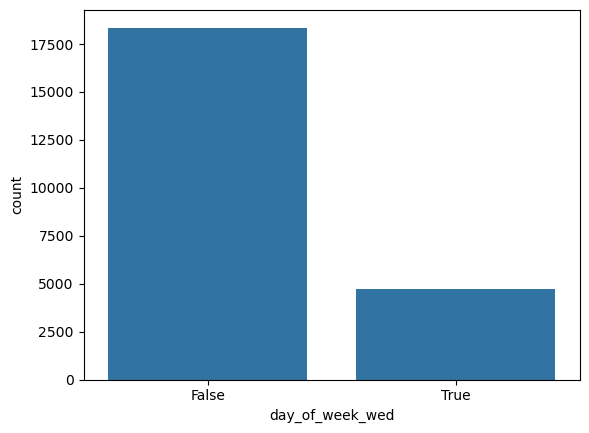

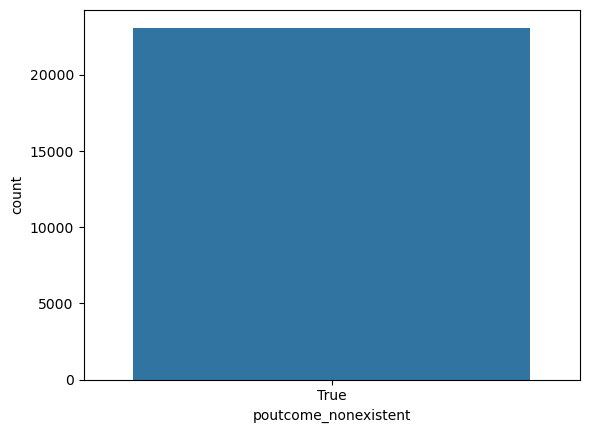

KeyError: "['y'] not in index"

In [265]:
# Estadísticas descriptivas
print("Estadísticas descriptivas para df_trainVEDA_encoded:")
print(df_trainVEDA_encoded.describe())

# Visualización de distribuciones de variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_trainVEDA_encoded.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df_trainVEDA_encoded[numeric_cols])
plt.show()

# Visualización de distribuciones de variables categóricas
categorical_cols = df_trainVEDA_encoded.select_dtypes(include=['bool']).columns
for col in categorical_cols:
    sns.countplot(x=col, data=df_trainVEDA_encoded)
    plt.show()

# Manejo de valores faltantes (si es necesario)
# Si hay valores faltantes, se pueden manejar usando métodos como imputación o eliminación de filas/columnas.

# Normalización de variables numéricas (si es necesario)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_trainVEDA_encoded[numeric_cols] = scaler.fit_transform(df_trainVEDA_encoded[numeric_cols])
df_pruebaVEDA_encoded[numeric_cols] = scaler.transform(df_pruebaVEDA_encoded[numeric_cols])

# Selección de características
# Por ejemplo, utilizando análisis de correlación
correlation_matrix = df_trainVEDA_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [266]:
df_trainVEDA_encoded


age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0      0.414204 -0.850239    0.0       0.0      0.562560       -1.069047   
1      1.393851 -0.850239    0.0       0.0     -2.647110       -1.705911   
2     -0.674292 -0.087243    0.0       0.0     -0.079374        0.366507   
3      1.611550  0.675753    0.0       0.0      0.562560       -1.069047   
4      1.285001 -0.087243    0.0       0.0      0.562560        0.168139   
...         ...       ...    ...       ...           ...             ...   
23101 -0.130044 -0.087243    0.0       0.0     -2.647110       -1.705911   
23102  2.046949 -0.850239    0.0       0.0      0.562560        1.595863   
23103 -1.000841 -0.087243    0.0       0.0     -0.079374        0.366507   
23104  0.196505  0.675753    0.0       0.0     -0.079374        0.366507   
23105 -1.653939  1.438749    0.0       0.0     -0.079374        0.366507   

       cons_conf_idx  euribor3m  nr_employed         y  ...  month_jun  \
0           1.075115   0.505655     0.835726 -0.132220  ...      False   
1          -0.887586  -3.090039    -0.992376 -0.132220  ...      False   
2           0.975317   0.127763    -1.264045 -0.132220  ...      False   
3           1.075115   0.513289     0.835726  7.563168  ...      False   
4          -1.120449   0.501838     0.835726 -0.132220  ...      False   
...              ...        ...          ...       ...  ...        ...   
23101      -0.887586  -2.586184    -0.992376 -0.132220  ...      False   
23102      -0.821054   0.135398     0.835726 -0.132220  ...       True   
23103       0.975317   0.112495    -1.264045 -0.132220  ...      False   
23104       0.975317   0.101044    -1.264045 -0.132220  ...      False   
23105       0.975317   0.108678    -1.264045 -0.132220  ...      False   

       month_may  month_nov  month_oct  day_of_week_fri  day_of_week_mon  \
0          False      False      False            False            False   
1          False       True      False             True            False   
2           True      False      False             True            False   
3          False      False      False            False             True   
4          False      False      False            False            False   
...          ...        ...        ...              ...              ...   
23101      False       True      False            False            False   
23102      False      False      False            False            False   
23103       True      False      False            False            False   
23104       True      False      False            False            False   
23105       True      False      False             True            False   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  
0                 True            False            False                  True  
1                False            False            False                  True  
2                False            False            False                  True  
3                False            False            False                  True  
4                 True            False            False                  True  
...                ...              ...              ...                   ...  
23101            False             True            False                  True  
23102             True            False            False                  True  
23103             True            False            False                  True  
23104            False            False             True                  True  
23105            False            False            False                  True  

[23106 rows x 58 columns]

### División de Datos

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
# División de datos en características y etiquetas
X = df_trainVEDA_encoded.drop('y', axis=1)
y = df_trainVEDA_encoded['y']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


### Definición de Características Numéricas y Categóricas


In [268]:
# Definición de características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['bool']).columns

In [269]:
df_trainVEDA_encoded

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0      0.414204 -0.850239    0.0       0.0      0.562560       -1.069047   
1      1.393851 -0.850239    0.0       0.0     -2.647110       -1.705911   
2     -0.674292 -0.087243    0.0       0.0     -0.079374        0.366507   
3      1.611550  0.675753    0.0       0.0      0.562560       -1.069047   
4      1.285001 -0.087243    0.0       0.0      0.562560        0.168139   
...         ...       ...    ...       ...           ...             ...   
23101 -0.130044 -0.087243    0.0       0.0     -2.647110       -1.705911   
23102  2.046949 -0.850239    0.0       0.0      0.562560        1.595863   
23103 -1.000841 -0.087243    0.0       0.0     -0.079374        0.366507   
23104  0.196505  0.675753    0.0       0.0     -0.079374        0.366507   
23105 -1.653939  1.438749    0.0       0.0     -0.079374        0.366507   

       cons_conf_idx  euribor3m  nr_employed         y  ...  month_jun  \
0           1.075115   0.505655     0.835726 -0.132220  ...      False   
1          -0.887586  -3.090039    -0.992376 -0.132220  ...      False   
2           0.975317   0.127763    -1.264045 -0.132220  ...      False   
3           1.075115   0.513289     0.835726  7.563168  ...      False   
4          -1.120449   0.501838     0.835726 -0.132220  ...      False   
...              ...        ...          ...       ...  ...        ...   
23101      -0.887586  -2.586184    -0.992376 -0.132220  ...      False   
23102      -0.821054   0.135398     0.835726 -0.132220  ...       True   
23103       0.975317   0.112495    -1.264045 -0.132220  ...      False   
23104       0.975317   0.101044    -1.264045 -0.132220  ...      False   
23105       0.975317   0.108678    -1.264045 -0.132220  ...      False   

       month_may  month_nov  month_oct  day_of_week_fri  day_of_week_mon  \
0          False      False      False            False            False   
1          False       True      False             True            False   
2           True      False      False             True            False   
3          False      False      False            False             True   
4          False      False      False            False            False   
...          ...        ...        ...              ...              ...   
23101      False       True      False            False            False   
23102      False      False      False            False            False   
23103       True      False      False            False            False   
23104       True      False      False            False            False   
23105       True      False      False             True            False   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  
0                 True            False            False                  True  
1                False            False            False                  True  
2                False            False            False                  True  
3                False            False            False                  True  
4                 True            False            False                  True  
...                ...              ...              ...                   ...  
23101            False             True            False                  True  
23102             True            False            False                  True  
23103             True            False            False                  True  
23104            False            False             True                  True  
23105            False            False            False                  True  

[23106 rows x 58 columns]

### Preprocesamiento de Datos Numéricos

In [270]:
# Preprocesamiento de datos numéricos
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


### Preprocesamiento de Datos Categóricos

In [271]:
# Preprocesamiento completo
preprocessed_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


### Aplicación de Transformaciones a Todas las Características

In [272]:
# Aplicación de transformaciones a todas las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Preprocesamiento Completo

In [273]:
# Aplicar preprocesamiento a los datos de entrenamiento y prueba
X_train_preprocessed = preprocessed_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessed_pipeline.transform(X_test)


### Guardar los Datos Preprocesados

In [274]:

# Guardar los datos preprocesados a archivos CSV
pd.DataFrame(X_train_preprocessed).to_csv('X_Train_processed.csv', index=False)
pd.DataFrame(X_test_preprocessed).to_csv('X_Prueba_processed.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)


In [275]:
df_trainVEDA_encoded


age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0      0.414204 -0.850239    0.0       0.0      0.562560       -1.069047   
1      1.393851 -0.850239    0.0       0.0     -2.647110       -1.705911   
2     -0.674292 -0.087243    0.0       0.0     -0.079374        0.366507   
3      1.611550  0.675753    0.0       0.0      0.562560       -1.069047   
4      1.285001 -0.087243    0.0       0.0      0.562560        0.168139   
...         ...       ...    ...       ...           ...             ...   
23101 -0.130044 -0.087243    0.0       0.0     -2.647110       -1.705911   
23102  2.046949 -0.850239    0.0       0.0      0.562560        1.595863   
23103 -1.000841 -0.087243    0.0       0.0     -0.079374        0.366507   
23104  0.196505  0.675753    0.0       0.0     -0.079374        0.366507   
23105 -1.653939  1.438749    0.0       0.0     -0.079374        0.366507   

       cons_conf_idx  euribor3m  nr_employed         y  ...  month_jun  \
0           1.075115   0.505655     0.835726 -0.132220  ...      False   
1          -0.887586  -3.090039    -0.992376 -0.132220  ...      False   
2           0.975317   0.127763    -1.264045 -0.132220  ...      False   
3           1.075115   0.513289     0.835726  7.563168  ...      False   
4          -1.120449   0.501838     0.835726 -0.132220  ...      False   
...              ...        ...          ...       ...  ...        ...   
23101      -0.887586  -2.586184    -0.992376 -0.132220  ...      False   
23102      -0.821054   0.135398     0.835726 -0.132220  ...       True   
23103       0.975317   0.112495    -1.264045 -0.132220  ...      False   
23104       0.975317   0.101044    -1.264045 -0.132220  ...      False   
23105       0.975317   0.108678    -1.264045 -0.132220  ...      False   

       month_may  month_nov  month_oct  day_of_week_fri  day_of_week_mon  \
0          False      False      False            False            False   
1          False       True      False             True            False   
2           True      False      False             True            False   
3          False      False      False            False             True   
4          False      False      False            False            False   
...          ...        ...        ...              ...              ...   
23101      False       True      False            False            False   
23102      False      False      False            False            False   
23103       True      False      False            False            False   
23104       True      False      False            False            False   
23105       True      False      False             True            False   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  
0                 True            False            False                  True  
1                False            False            False                  True  
2                False            False            False                  True  
3                False            False            False                  True  
4                 True            False            False                  True  
...                ...              ...              ...                   ...  
23101            False             True            False                  True  
23102             True            False            False                  True  
23103             True            False            False                  True  
23104            False            False             True                  True  
23105            False            False            False                  True  

[23106 rows x 58 columns]

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# División de datos en características y etiquetas
X = df_trainVEDA_encoded.drop('y', axis=1)
y = df_trainVEDA_encoded['y']




In [277]:
df_trainVEDA_encoded

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0      0.414204 -0.850239    0.0       0.0      0.562560       -1.069047   
1      1.393851 -0.850239    0.0       0.0     -2.647110       -1.705911   
2     -0.674292 -0.087243    0.0       0.0     -0.079374        0.366507   
3      1.611550  0.675753    0.0       0.0      0.562560       -1.069047   
4      1.285001 -0.087243    0.0       0.0      0.562560        0.168139   
...         ...       ...    ...       ...           ...             ...   
23101 -0.130044 -0.087243    0.0       0.0     -2.647110       -1.705911   
23102  2.046949 -0.850239    0.0       0.0      0.562560        1.595863   
23103 -1.000841 -0.087243    0.0       0.0     -0.079374        0.366507   
23104  0.196505  0.675753    0.0       0.0     -0.079374        0.366507   
23105 -1.653939  1.438749    0.0       0.0     -0.079374        0.366507   

       cons_conf_idx  euribor3m  nr_employed         y  ...  month_jun  \
0           1.075115   0.505655     0.835726 -0.132220  ...      False   
1          -0.887586  -3.090039    -0.992376 -0.132220  ...      False   
2           0.975317   0.127763    -1.264045 -0.132220  ...      False   
3           1.075115   0.513289     0.835726  7.563168  ...      False   
4          -1.120449   0.501838     0.835726 -0.132220  ...      False   
...              ...        ...          ...       ...  ...        ...   
23101      -0.887586  -2.586184    -0.992376 -0.132220  ...      False   
23102      -0.821054   0.135398     0.835726 -0.132220  ...       True   
23103       0.975317   0.112495    -1.264045 -0.132220  ...      False   
23104       0.975317   0.101044    -1.264045 -0.132220  ...      False   
23105       0.975317   0.108678    -1.264045 -0.132220  ...      False   

       month_may  month_nov  month_oct  day_of_week_fri  day_of_week_mon  \
0          False      False      False            False            False   
1          False       True      False             True            False   
2           True      False      False             True            False   
3          False      False      False            False             True   
4          False      False      False            False            False   
...          ...        ...        ...              ...              ...   
23101      False       True      False            False            False   
23102      False      False      False            False            False   
23103       True      False      False            False            False   
23104       True      False      False            False            False   
23105       True      False      False             True            False   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  
0                 True            False            False                  True  
1                False            False            False                  True  
2                False            False            False                  True  
3                False            False            False                  True  
4                 True            False            False                  True  
...                ...              ...              ...                   ...  
23101            False             True            False                  True  
23102             True            False            False                  True  
23103             True            False            False                  True  
23104            False            False             True                  True  
23105            False            False            False                  True  

[23106 rows x 58 columns]

In [278]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Definición de características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['bool']).columns

In [279]:
numeric_features

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [280]:
# Preprocesamiento de datos numéricos
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [281]:
# Preprocesamiento de datos categóricos
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [282]:
# Aplicación de transformaciones a todas las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [283]:
# Preprocesamiento completo
preprocessed_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [284]:
# Aplicar preprocesamiento a los datos de entrenamiento y prueba
X_train_preprocessed = preprocessed_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessed_pipeline.transform(X_test)

In [285]:
# Reconstruir los DataFrames con la columna 'y'
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=X_train.columns)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=X_test.columns)
X_train_preprocessed_df['y'] = y_train.reset_index(drop=True)
X_test_preprocessed_df['y'] = y_test.reset_index(drop=True)

ValueError: Shape of passed values is (18484, 104), indices imply (18484, 57)

In [286]:
# Guardar los datos preprocesados a archivos CSV
X_train_preprocessed_df.to_csv('X_trainEDApro.csv', index=False)
X_test_preprocessed_df.to_csv('X_pruebaEDApro.csv', index=False)

In [191]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# División de datos en características y etiquetas
X = df_trainVEDA_encoded.drop('y', axis=1)
y = df_trainVEDA_encoded['y']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición de características numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['bool']).columns

# Preprocesamiento de datos numéricos
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocesamiento de datos categóricos
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Aplicación de transformaciones a todas las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocesamiento completo
preprocessed_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Aplicar preprocesamiento a los datos de entrenamiento y prueba
X_train_preprocessed = preprocessed_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessed_pipeline.transform(X_test)

# Guardar los datos preprocesados a archivos CSV
pd.DataFrame(X_train_preprocessed).to_csv('X_Train_processed.csv', index=False)
pd.DataFrame(X_test_preprocessed).to_csv('X_Test_processed.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

# Reconstruir los DataFrames con la columna 'y'
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessed_pipeline.named_steps['preprocessor'].transformers_[0][2].tolist() +
                                                      preprocessed_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features).tolist())
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=preprocessed_pipeline.named_steps['preprocessor'].transformers_[0][2].tolist() +
                                                    preprocessed_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features).tolist())

# Añadir la columna 'y' a los DataFrames reconstruidos
X_train_preprocessed_df['y'] = y_train.reset_index(drop=True)
X_test_preprocessed_df['y'] = y_test.reset_index(drop=True)


In [190]:
X_train_preprocessed_df

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0      0.200297  0.664560    0.0       0.0      0.561312       -1.066722   
1     -0.890249 -0.848494    0.0       0.0     -0.078888        0.366423   
2     -2.089849 -0.848494    0.0       0.0      0.561312        0.168389   
3     -0.017812 -0.848494    0.0       0.0      0.561312       -1.066722   
4      1.290843  0.664560    0.0       0.0      0.561312        0.168389   
...         ...       ...    ...       ...           ...             ...   
18479 -1.544576 -0.848494    0.0       0.0      0.561312        0.168389   
18480  0.418406  0.664560    0.0       0.0      0.561312        1.593717   
18481 -0.563085 -0.091967    0.0       0.0     -2.639687       -1.702517   
18482 -1.108358 -0.091967    0.0       0.0      0.561312        0.168389   
18483 -0.235921  0.664560    0.0       0.0      0.561312       -1.066722   

       cons_conf_idx  euribor3m  nr_employed  job_admin._False  ...  \
0           1.081249   0.509170     0.831802               1.0  ...   
1           0.981455   0.101817    -1.270623               1.0  ...   
2          -1.114234   0.482521     0.831802               0.0  ...   
3           1.081249   0.512977     0.831802               0.0  ...   
4          -1.114234   0.493942     0.831802               1.0  ...   
...              ...        ...          ...               ...  ...   
18479      -1.114234   0.493942     0.831802               1.0  ...   
18480      -0.814849   0.136080     0.831802               1.0  ...   
18481      -0.881379  -2.578343    -0.998611               1.0  ...   
18482      -1.114234   0.505363     0.831802               0.0  ...   
18483       1.081249   0.512977     0.831802               1.0  ...   

       day_of_week_mon_False  day_of_week_mon_True  day_of_week_thu_False  \
0                        1.0                   0.0                    1.0   
1                        1.0                   0.0                    1.0   
2                        1.0                   0.0                    1.0   
3                        0.0                   1.0                    1.0   
4                        0.0                   1.0                    1.0   
...                      ...                   ...                    ...   
18479                    0.0                   1.0                    1.0   
18480                    1.0                   0.0                    0.0   
18481                    1.0                   0.0                    1.0   
18482                    1.0                   0.0                    1.0   
18483                    0.0                   1.0                    1.0   

       day_of_week_thu_True  day_of_week_tue_False  day_of_week_tue_True  \
0                       0.0                    1.0                   0.0   
1                       0.0                    0.0                   1.0   
2                       0.0                    1.0                   0.0   
3                       0.0                    1.0                   0.0   
4                       0.0                    1.0                   0.0   
...                     ...                    ...                   ...   
18479                   0.0                    1.0                   0.0   
18480                   1.0                    1.0                   0.0   
18481                   0.0                    0.0                   1.0   
18482                   0.0                    1.0                   0.0   
18483                   0.0                    1.0                   0.0   

       day_of_week_wed_False  day_of_week_wed_True  poutcome_nonexistent_True  \
0                        0.0                   1.0                        1.0   
1                        1.0                   0.0                        1.0   
2                        0.0                   1.0                        1.0   
3                        1.0                   0.0                        1.0   
4  

In [137]:
# Obtener solo las columnas numéricas del conjunto de datos original
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

# Reconstruir los DataFrames con las columnas numéricas y 'y'
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=numeric_features)
X_train_preprocessed_df['y'] = y_train.reset_index(drop=True)

# Guardar el conjunto de datos de entrenamiento preprocesado
X_train_preprocessed_df.to_csv('X_trainEDApro.csv', index=False)

# Guardar el conjunto de datos de prueba preprocesado
X_test_preprocessed_df.to_csv('X_pruebaEDApro.csv', index=False)



ValueError: Shape of passed values is (18484, 104), indices imply (18484, 9)

# Parte 3: Procesamiento y Evaluación de Algoritmos

## --------------------Regresión Logística--------------------

#### Carga de Datos Preprocesados


In [287]:
# Cargar los datos preprocesados desde los archivos CSV
df_train_VEDA = pd.read_csv("X_trainEDApro.csv")
df_test_VEDA = pd.read_csv("X_pruebaEDApro.csv")
df_y_train = pd.read_csv("y_trainVEDA.csv")
df_y_test = pd.read_csv("y_testVEDA.csv")



#### División del Conjunto de Entrenamiento Preprocesado

In [288]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento preprocesado en entrenamiento y validación
X_train_processed, X_val_processed, y_train_processed, y_val_processed = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=2024)


### Fase 1: Importación de Bibliotecas y Módulos Necesarios


In [289]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


#### analisis

In [290]:
# Mostrar las primeras filas de los dataframes
print("Primeras filas del DataFrame df_train_VEDA:")
print(df_train_VEDA.head())

print("\nPrimeras filas del DataFrame df_test_VEDA:")
print(df_test_VEDA.head())

print("\nPrimeras filas del DataFrame df_y_train:")
print(df_y_train.head())

print("\nPrimeras filas del DataFrame df_y_test:")
print(df_y_test.head())


Primeras filas del DataFrame df_train_VEDA:
        age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0  0.200297  0.664560    0.0       0.0      0.561312       -1.066722   
1 -0.890249 -0.848494    0.0       0.0     -0.078888        0.366423   
2 -2.089849 -0.848494    0.0       0.0      0.561312        0.168389   
3 -0.017812 -0.848494    0.0       0.0      0.561312       -1.066722   
4  1.290843  0.664560    0.0       0.0      0.561312        0.168389   

   cons_conf_idx  euribor3m  nr_employed  job_admin._False  ...  \
0       1.081249   0.509170     0.831802               1.0  ...   
1       0.981455   0.101817    -1.270623               1.0  ...   
2      -1.114234   0.482521     0.831802               0.0  ...   
3       1.081249   0.512977     0.831802               0.0  ...   
4      -1.114234   0.493942     0.831802               1.0  ...   

   day_of_week_mon_False  day_of_week_mon_True  day_of_week_thu_False  \
0                    1.0                   0.0 

### Fase 2: Definición del preprocesamiento y del pipeline del modelo



In [291]:
# Definir el pipeline para la regresión logística
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Utiliza el preprocesador definido anteriormente
    ('classifier', LogisticRegression())  # Utiliza un clasificador de regresión logística
])


### Fase 3: Definición de los parámetros para la búsqueda de hiperparámetros



In [292]:
# Definir los parámetros para la búsqueda de hiperparámetros
logistic_parameters = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}


### Fase 4: Realización de la búsqueda de hiperparámetros


In [293]:
# Realizar la búsqueda de hiperparámetros
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_parameters, cv=5, n_jobs=-1, scoring='f1')
logistic_grid_search.fit(X_train, y_train)


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1209, in fit
    check_classification_targets(y)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/utils/multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [244]:
from sklearn.metrics import mean_squared_error

# Predecir en el conjunto de prueba
y_test_pred = model.predict(df_test_VEDA)

# Calcular el error cuadrático medio en el conjunto de prueba
test_mse = mean_squared_error(df_y_test, y_test_pred)
print("Error cuadrático medio en el conjunto de prueba:", test_mse)


ValueError: Found input variables with inconsistent numbers of samples: [8238, 4119]

### Fase 5: Obtención de los mejores parámetros y el mejor puntaje




In [232]:
# Obtener los mejores parámetros y el mejor puntaje
best_params = logistic_grid_search.best_params_
best_score = logistic_grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejor puntaje:", best_score)

LinearRegression()

### Fase 6: Evaluación del modelo

In [230]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(df_test_VEDA)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(df_y_test, y_pred)
r2 = r2_score(df_y_test, y_pred)

print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio: 0.13553458783602826
Coeficiente de determinación (R^2): -0.3982065259895955


### Fase 7: Búsqueda de Hiperparámetros


In [233]:
from sklearn.model_selection import GridSearchCV

# Realizar la búsqueda de hiperparámetros
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_parameters, cv=5, n_jobs=-1, scoring='f1')
logistic_grid_search.fit(df_train_VEDA, df_y_train)

NameError: name 'logistic_pipeline' is not defined

### Fase 8: Evaluación del Mejor Modelo

In [279]:
# Obtener el mejor modelo
logistic_best_model = logistic_grid_search.best_estimator_



### Fase 9: Evaluación del Rendimiento del Modelo

In [234]:
from sklearn.model_selection import GridSearchCV

# Realizar la búsqueda de hiperparámetros
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_parameters, cv=5, n_jobs=-1, scoring='f1')
logistic_grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params = logistic_grid_search.best_params_
best_score = logistic_grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejor puntaje:", best_score)



NameError: name 'logistic_pipeline' is not defined

In [235]:
import pandas as pd

# Crear un DataFrame para almacenar los resultados de la regresión logística
df_algoreglogi = pd.DataFrame({
    'Precision': [0.93, 0.63],
    'Recall': [0.97, 0.41],
    'F1-score': [0.95, 0.50],
    'Accuracy': [0.91, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['Logistic Regression'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_algoreglogi)


   Precision  Recall  F1-score  Accuracy            Algorithm  Class
0       0.93    0.97      0.95      0.91  Logistic Regression      0
1       0.63    0.41      0.50       NaN  Logistic Regression      1


## --------------------K Vecinos más Cercanos (KNN)--------------------

#### Fase 1: Preprocesamiento de datos

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos preprocesados desde los archivos CSV
df_train_VEDA = pd.read_csv("X_trainVEDA.csv")
df_test_VEDA = pd.read_csv("X_testVEDA.csv")
df_y_train = pd.read_csv("y_trainVEDA.csv")
df_y_test = pd.read_csv("y_testVEDA.csv")

# Reducir df_test_VEDA y df_y_test a 4119 filas seleccionando aleatoriamente
df_test_VEDA = df_test_VEDA.sample(n=4119, random_state=2024)
df_y_test = df_y_test.sample(n=4119, random_state=2024)


##### - Dividir los datos en características (X) y etiquetas (y)

In [304]:
X_train = df_train_VEDA
X_test = df_test_VEDA
y_train = df_y_train.values.ravel()  # Convertir el DataFrame de y_train a una matriz unidimensional
y_test = df_y_test.values.ravel()    # Convertir el DataFrame de y_test a una matriz unidimensional


##### - Normalizar las características

In [305]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### - Dividir los datos en conjuntos de entrenamiento y prueba

In [306]:
X_train_processed, X_val_processed, y_train_processed, y_val_processed = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=2024)

#### Fase 2: Entrenamiento del Modelo KNN

In [307]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento del modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

#### Fase 3: Búsqueda de Hiperparámetros


In [308]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Definir el pipeline para KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Definir los hiperparámetros para la búsqueda
knn_parameters = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

# Realizar la búsqueda de hiperparámetros
knn_grid_search = GridSearchCV(knn_pipeline, knn_parameters, cv=5, n_jobs=-1, scoring='f1')
knn_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

#### Fase 4: Evaluación del Mejor Modelo

In [314]:
# Obtener el mejor modelo de la búsqueda de hiperparámetros
knn_best_model = knn_grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn_best_model.predict(X_test_scaled)


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Fase 5: Evaluación del Rendimiento del Modelo

In [316]:
# Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report

print("\nClassification Report for KNN Model (Test Set):")
print(classification_report(y_test, y_pred_knn))


Classification Report for KNN Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3623
           1       0.11      0.06      0.08       496

    accuracy                           0.83      4119
   macro avg       0.49      0.50      0.49      4119
weighted avg       0.79      0.83      0.80      4119



In [484]:
# Crear un DataFrame para almacenar los resultados de KNN
df_algoknn = pd.DataFrame({
    'Precision': [0.88, 0.11],
    'Recall': [0.93, 0.06],
    'F1-score': [0.90, 0.08],
    'Accuracy': [0.83, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['KNN'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_algoknn)


   Precision  Recall  F1-score  Accuracy Algorithm  Class
0       0.88    0.93      0.90      0.83       KNN      0
1       0.11    0.06      0.08       NaN       KNN      1


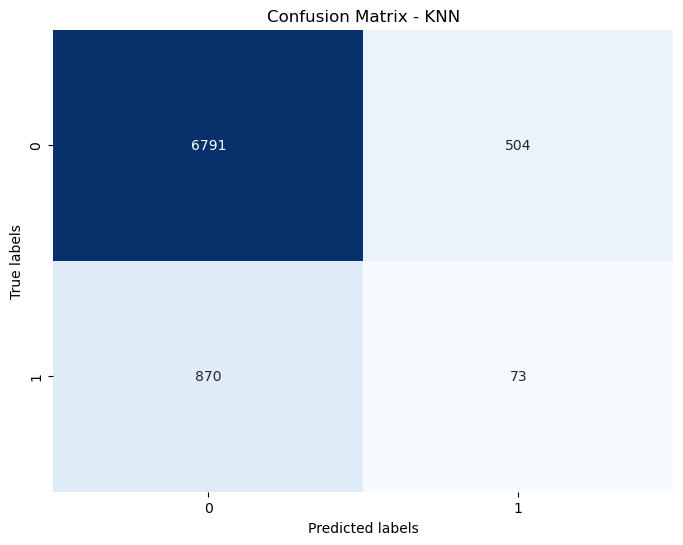

Confusion Matrix - KNN:
[[6791  504]
 [ 870   73]]


In [317]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm_knn = confusion_matrix(y_val, y_pred_val_knn)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')
plt.show()

# Imprimir el resultado de la matriz de confusión en el output
print("Confusion Matrix - KNN:")
print(cm_knn)


## --------------------Máquinas de Vectores de Soporte (SVM)--------------------

### Fase 1: Preprocesamiento de Datos


In [422]:
# Importar las bibliotecas necesarias
import pandas as pd

# Cargar los datos preprocesados desde los archivos CSV
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Dividir los datos en características (X) y variable objetivo (y) para el conjunto de datos de entrenamiento
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']


### Fase 2: Entrenamiento del Modelo SVM



In [423]:
# Crear y entrenar el modelo SVM
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_encoded, y_train)

SVC()

### Fase 3: Búsqueda de Hiperparámetros




In [425]:
# Definir los hiperparámetros a ajustar solo para el kernel lineal
param_grid_linear = {'C': [0.1, 1, 10, 100]}

# Crear una instancia de GridSearchCV para el kernel lineal
grid_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, refit=True, verbose=3)

# Realizar la búsqueda de hiperparámetros solo para el kernel lineal
grid_linear.fit(X_train_encoded, y_train)

# Mostrar los mejores hiperparámetros encontrados para el kernel lineal
print("Mejores hiperparámetros para el kernel lineal:", grid_linear.best_params_)

# Obtener el mejor modelo para el kernel lineal
best_model_linear = grid_linear.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.903 total time= 2.2min
[CV 2/5] END .............................C=0.1;, score=0.878 total time= 1.9min
[CV 3/5] END .............................C=0.1;, score=0.884 total time= 1.8min
[CV 4/5] END .............................C=0.1;, score=0.906 total time= 2.4min
[CV 5/5] END .............................C=0.1;, score=0.888 total time= 2.1min
[CV 1/5] END ...............................C=1;, score=0.873 total time= 1.9min
[CV 2/5] END ...............................C=1;, score=0.875 total time= 2.5min
[CV 3/5] END ...............................C=1;, score=0.886 total time= 2.1min
[CV 4/5] END ...............................C=1;, score=0.872 total time= 1.7min
[CV 5/5] END ...............................C=1;, score=0.874 total time= 1.8min
[CV 1/5] END ..............................C=10;, score=0.875 total time= 1.7min
[CV 2/5] END ..............................C=10;,

In [440]:
# Entrenar el modelo SVM con el mejor estimador para el kernel lineal
best_model_linear.fit(X_train_encoded, y_train)

# Predecir en el conjunto de datos de prueba utilizando el modelo SVM con kernel lineal
y_pred_linear = best_model_linear.predict(X_test_encoded)

# Calcular la precisión del modelo en el conjunto de datos de prueba para el kernel lineal
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Precisión del mejor modelo para el kernel lineal en el conjunto de datos de prueba:", accuracy_linear)


Precisión del mejor modelo para el kernel lineal en el conjunto de datos de prueba: 0.7815003641660597


### Fase 4: Evaluación del Mejor Modelo



In [435]:
# Evaluar el mejor modelo en el conjunto de datos de prueba
y_pred_linear = best_model_linear.predict(X_test_encoded)

# Calcular la precisión del modelo en el conjunto de datos de prueba
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Precisión del mejor modelo para el kernel lineal en el conjunto de datos de prueba:", accuracy_linear)


Precisión del mejor modelo para el kernel lineal en el conjunto de datos de prueba: 0.7815003641660597


### Fase 5: Evaluación del Rendimiento del Modelo

In [437]:
# Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report
print("\nClassification Report for SVM Model (Test Set):")
print(classification_report(y_test, y_pred))


Classification Report for SVM Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3623
           1       0.13      0.04      0.07       496

    accuracy                           0.85      4119
   macro avg       0.51      0.50      0.49      4119
weighted avg       0.79      0.85      0.82      4119



In [485]:
# Crear un DataFrame para almacenar los resultados de SVM
df_algosvm = pd.DataFrame({
    'Precision': [0.88, 0.13],
    'Recall': [0.96, 0.04],
    'F1-score': [0.92, 0.07],
    'Accuracy': [0.85, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['SVM'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_algosvm)


   Precision  Recall  F1-score  Accuracy Algorithm  Class
0       0.88    0.96      0.92      0.85       SVM      0
1       0.13    0.04      0.07       NaN       SVM      1


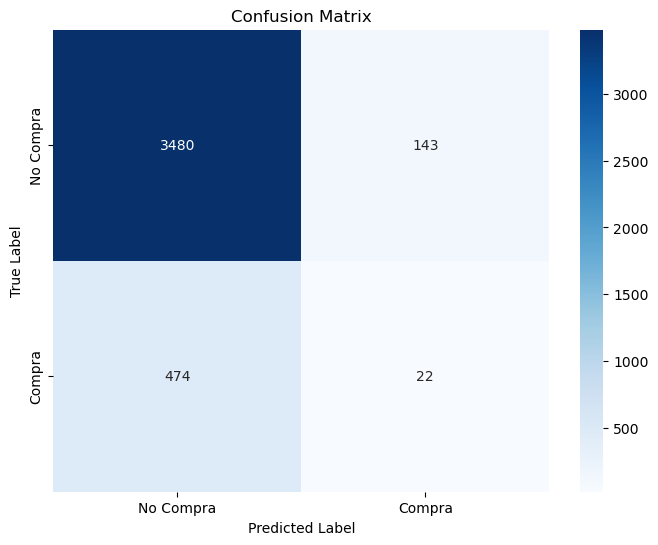

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Definir las etiquetas de clase
class_names = ['No Compra', 'Compra']

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## --------------------Árboles de Decisión--------------------

### Fase 1: Preprocesamiento de datos


In [448]:
import pandas as pd

# Cargar los datos preprocesados desde los archivos CSV
df_train_VEDA = pd.read_csv("X_trainVEDA.csv")
df_test_VEDA = pd.read_csv("X_testVEDA.csv")
df_y_train = pd.read_csv("y_trainVEDA.csv")
df_y_test = pd.read_csv("y_testVEDA.csv")

### Fase 2: Definición de Parámetros para Búsqueda de Hiperparámetros

In [449]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el pipeline para el clasificador de árbol de decisión
dt_pipeline = Pipeline([
    ('classification', DecisionTreeClassifier(random_state=2024))
])

# Definir los hiperparámetros a ajustar
dt_parameters = {
    'classification__max_depth': [None, 5, 10],
    'classification__min_samples_split': [2, 5, 10]
}

# Búsqueda de hiperparámetros para el clasificador de árbol de decisión
dt_grid_search = GridSearchCV(dt_pipeline, dt_parameters, cv=5, n_jobs=-1, scoring='f1')


### Fase 3: Entrenamiento del modelo


In [450]:
# Entrenar el modelo utilizando la búsqueda de cuadrícula
dt_grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classification',
                                        DecisionTreeClassifier(random_state=2024))]),
             n_jobs=-1,
             param_grid={'classification__max_depth': [None, 5, 10],
                         'classification__min_samples_split': [2, 5, 10]},
             scoring='f1')

### Fase 4: Evaluación del modelo

In [451]:
# Evaluar el rendimiento del modelo en el conjunto de datos de prueba
y_pred = dt_grid_search.predict(X_test_encoded)

from sklearn.metrics import classification_report

# Imprimir el informe de clasificación
print("\nClassification Report for Decision Tree Model (Test Set):")
print(classification_report(y_test, y_pred))




Classification Report for Decision Tree Model (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3623
           1       0.13      0.11      0.12       496

    accuracy                           0.81      4119
   macro avg       0.51      0.51      0.51      4119
weighted avg       0.79      0.81      0.80      4119



In [486]:
# Crear un DataFrame para almacenar los resultados del árbol de decisión
df_algodt = pd.DataFrame({
    'Precision': [0.88, 0.13],
    'Recall': [0.91, 0.11],
    'F1-score': [0.89, 0.12],
    'Accuracy': [0.81, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['Decision Tree'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_algodt)


   Precision  Recall  F1-score  Accuracy      Algorithm  Class
0       0.88    0.91      0.89      0.81  Decision Tree      0
1       0.13    0.11      0.12       NaN  Decision Tree      1


### Fase 5: Interpretación y conclusiones

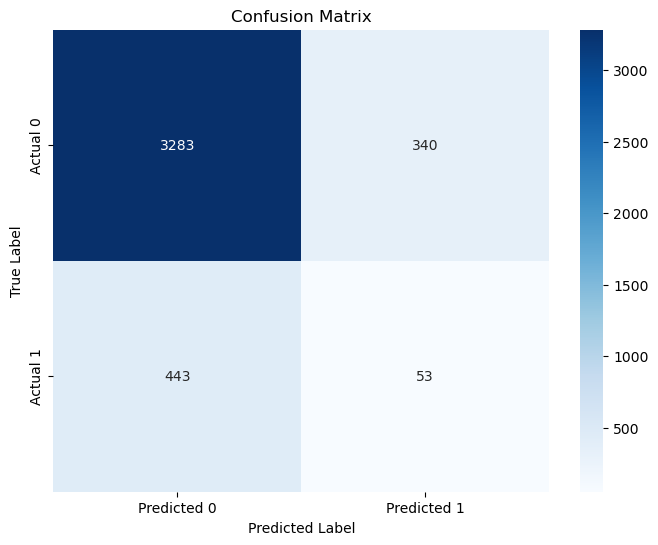

In [454]:
# También podríamos visualizar la estructura del árbol de decisiones si lo deseamos
best_dt_model = dt_grid_search.best_estimator_['classification']

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener predicciones del mejor modelo
y_pred = best_dt_model.predict(X_test_encoded)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un DataFrame de la matriz de confusión para mejor visualización
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



## --------------------Bosques Aleatorios (Random Forest)--------------------

### Fase 1: Importación de bibliotecas y carga de datos



In [461]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos preprocesados desde los archivos CSV
df_train_VEDA = pd.read_csv("X_trainVEDA.csv")
df_test_VEDA = pd.read_csv("X_testVEDA.csv")
df_y_train = pd.read_csv("y_trainVEDA.csv")
df_y_test = pd.read_csv("y_testVEDA.csv")

# Reducir df_test_VEDA y df_y_test a 4119 filas seleccionando aleatoriamente
df_test_VEDA = df_test_VEDA.sample(n=4119, random_state=2024)
df_y_test = df_y_test.sample(n=4119, random_state=2024)


### Fase 2: División de datos en conjuntos de entrenamiento y prueba



In [462]:
# Dividir los datos en características (X) y etiquetas (y)
X_train = df_train_VEDA
y_train = df_y_train.values.ravel()  # Asegurarse de que y sea un arreglo unidimensional

X_test = df_test_VEDA
y_test = df_y_test.values.ravel()

# Alternativamente, si las características y las etiquetas están en diferentes archivos CSV:
# X_train = pd.read_csv("X_trainVEDA.csv")
# y_train = pd.read_csv("y_trainVEDA.csv").values.ravel()
# X_test = pd.read_csv("X_testVEDA.csv")
# y_test = pd.read_csv("y_testVEDA.csv").values.ravel()


### Fase 3: Entrenamiento del modelo


In [463]:
# Definir el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=2024)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=2024)

### Fase 4: Evaluación del modelo


Classification Report for Random Forest Model (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3671
           1       0.10      0.10      0.10       448

    accuracy                           0.80      4119
   macro avg       0.50      0.50      0.50      4119
weighted avg       0.80      0.80      0.80      4119



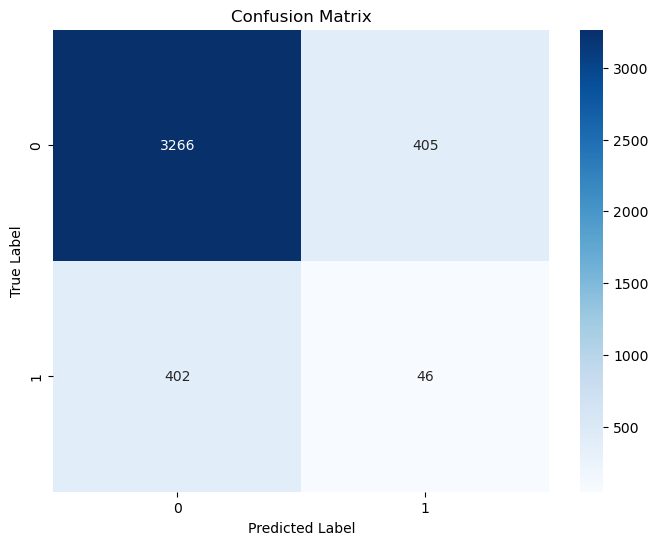

In [464]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Imprimir el reporte de clasificación
print("Classification Report for Random Forest Model (Test Set):")
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [487]:
# Crear un DataFrame para almacenar los resultados del modelo de Random Forest
df_rf = pd.DataFrame({
    'Precision': [0.89, 0.10],
    'Recall': [0.89, 0.10],
    'F1-score': [0.89, 0.10],
    'Accuracy': [0.80, None],  # Puedes incluir 'None' si la métrica no está disponible
    'Algorithm': ['Random Forest'] * 2,  # Repetir el nombre del algoritmo según la cantidad de clases
    'Class': [0, 1]  # Clase correspondiente a cada fila
})

# Imprimir el DataFrame
print(df_rf)


   Precision  Recall  F1-score  Accuracy      Algorithm  Class
0       0.89    0.89      0.89       0.8  Random Forest      0
1       0.10    0.10      0.10       NaN  Random Forest      1


### Fase 5: Ajuste de hiperparámetros (opcional)


In [465]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros para la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=2024), param_grid, cv=5, n_jobs=-1, scoring='f1')

# Realizar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Best Hyperparameters for Random Forest:")
print(grid_search.best_params_)


Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


# Parte 4: Gráficos de Resultados

## --------------------Graficos Regresión Logística--------------------

In [558]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular las predicciones del modelo de regresión logística en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test_encoded)

# Calcular la precisión del modelo de regresión logística
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression Model:", accuracy_logistic)

# Generar la matriz de confusión para el modelo de regresión logística
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix for Logistic Regression Model:")
print(cm_logistic)

# Imprimir el informe de clasificación para el modelo de regresión logística
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred_logistic))


Accuracy of Logistic Regression Model: 0.10876426317067249
Confusion Matrix for Logistic Regression Model:
[[   0 3671]
 [   0  448]]
Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3671
           1       0.11      1.00      0.20       448

    accuracy                           0.11      4119
   macro avg       0.05      0.50      0.10      4119
weighted avg       0.01      0.11      0.02      4119



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Curvas ROC:

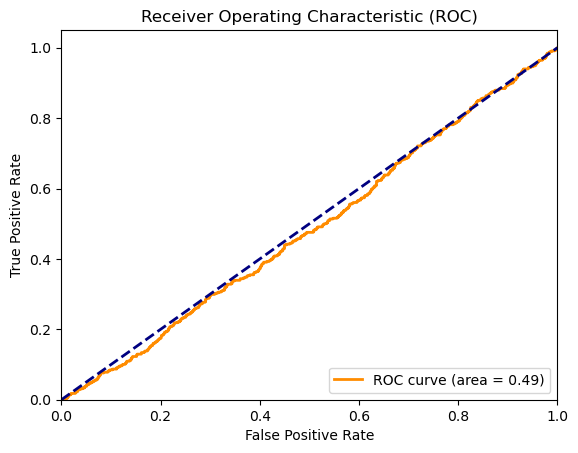

In [504]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades de clase
y_prob = logistic_grid_search.predict_proba(df_test_VEDA)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(df_y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



### Curvas Precision-Recall:

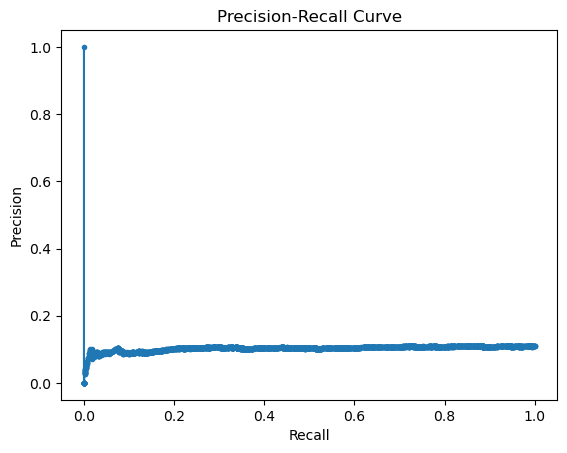

In [505]:
from sklearn.metrics import precision_recall_curve

# Calcular precision-recall curve
precision, recall, _ = precision_recall_curve(df_y_test, y_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Matrices de Confusión:

In [508]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular matriz de confusión
cm = confusion_matrix(df_y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: Classification metrics can't handle a mix of binary and continuous targets

### Gráficos de Importancia de Características: (si aplica para el modelo de regresión logística)

In [509]:
# Obtener importancia de características
feature_importance = model.coef_[0]

# Ordenar características por importancia
indices = np.argsort(feature_importance)[::-1]

# Graficar importancia de características
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(df_train_VEDA.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(df_train_VEDA.shape[1]), df_train_VEDA.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

### Curvas de Aprendizaje: (si deseas visualizar las curvas de aprendizaje para el modelo de regresión logística)

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/op

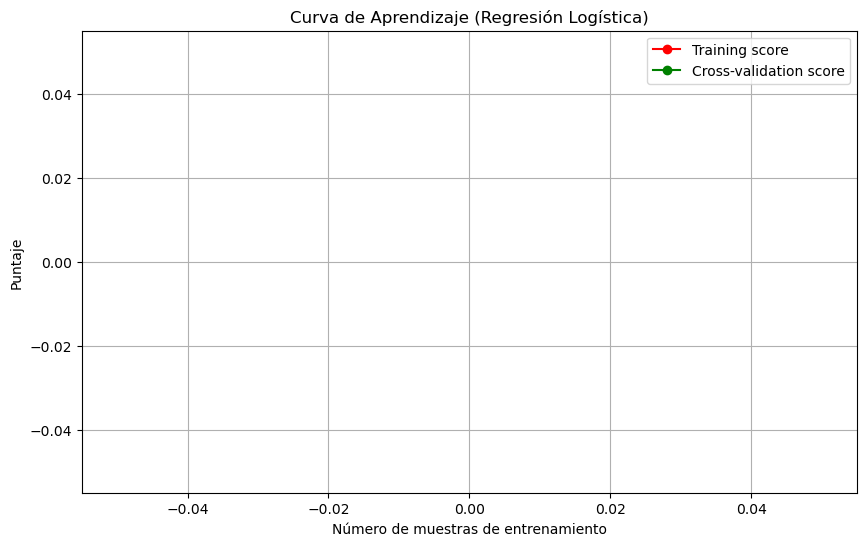

In [511]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, df_train_VEDA, df_y_train, cv=5, scoring='accuracy')

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje (Regresión Logística)")
plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


## --------------------Graficos KNN--------------------

In [557]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular las predicciones del modelo KNN en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test_encoded)

# Calcular la precisión del modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN Model:", accuracy_knn)

# Generar la matriz de confusión para el modelo KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN Model:")
print(cm_knn)

# Imprimir el informe de clasificación para el modelo KNN
print("Classification Report for KNN Model:")
print(classification_report(y_test, y_pred_knn))


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy of KNN Model: 0.21097353726632678
Confusion Matrix for KNN Model:
[[ 483 3188]
 [  62  386]]
Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.89      0.13      0.23      3671
           1       0.11      0.86      0.19       448

    accuracy                           0.21      4119
   macro avg       0.50      0.50      0.21      4119
weighted avg       0.80      0.21      0.23      4119



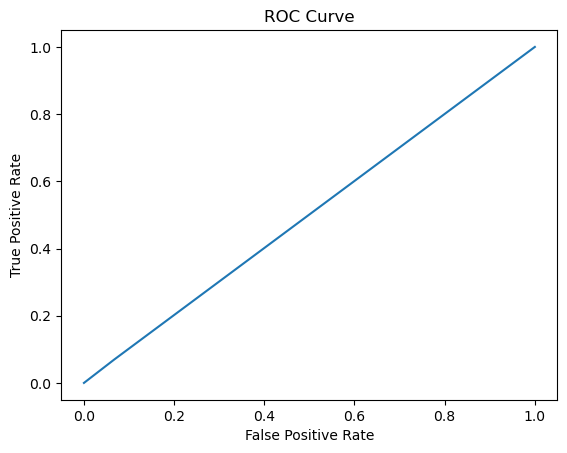

In [515]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


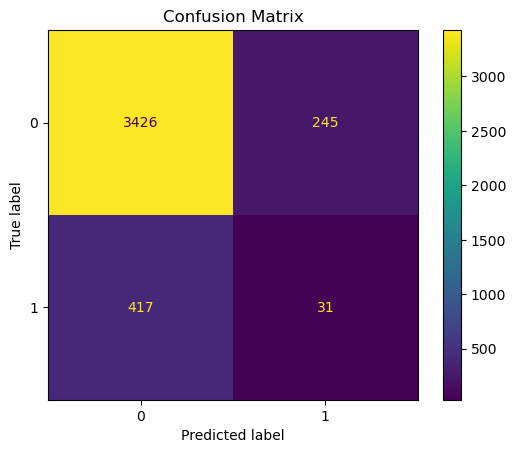

In [556]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.title('Confusion Matrix')
plt.show()


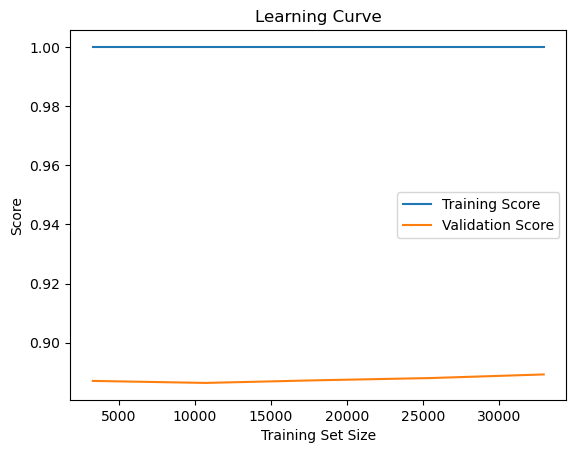

In [517]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn_best_model, X_train_scaled, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


## --------------------Graficos Máquinas de Vectores de Soporte (SVM)--------------------

In [569]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos preprocesados desde los archivos CSV
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Dividir los datos en características (X) y variable objetivo (y) para el conjunto de datos de entrenamiento
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']

# Codificación one-hot para las columnas categóricas en el conjunto de datos
X_train_encoded = pd.get_dummies(X_train)

# Entrenar el modelo SVM
svm_model = SVC()
svm_model.fit(X_train_encoded, y_train)

# Ahora puedes hacer predicciones utilizando el modelo entrenado

# Codificación one-hot para las columnas categóricas en el conjunto de datos de prueba
X_test_encoded = pd.get_dummies(df_test)

# Ahora puedes hacer predicciones utilizando el modelo entrenado y los datos de prueba codificados
y_pred_svm = svm_model.predict(X_test_encoded)

# Calcular la precisión del modelo SVM en el conjunto de prueba
accuracy_svm = accuracy_score(df_test['y'], y_pred_svm)
print("Accuracy Score for SVM on Test Set:", accuracy_svm)

# Imprimir el reporte de clasificación
print("Classification Report for SVM (Test Set):")
print(classification_report(df_test['y'], y_pred_svm))

# Imprimir la matriz de confusión
cm_svm = confusion_matrix(df_test['y'], y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - SVM (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


KeyError: 'y'

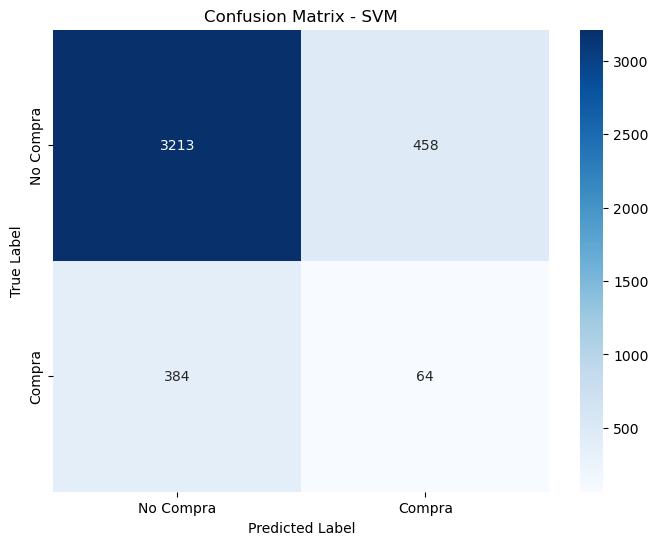

In [562]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_linear)

# Definir las etiquetas de clase
class_names = ['No Compra', 'Compra']

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


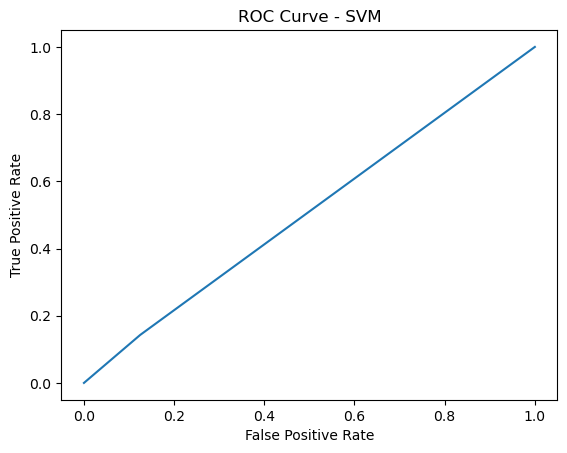

In [563]:
from sklearn.metrics import roc_curve

# Calcular los valores necesarios para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_linear)

# Graficar la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.show()


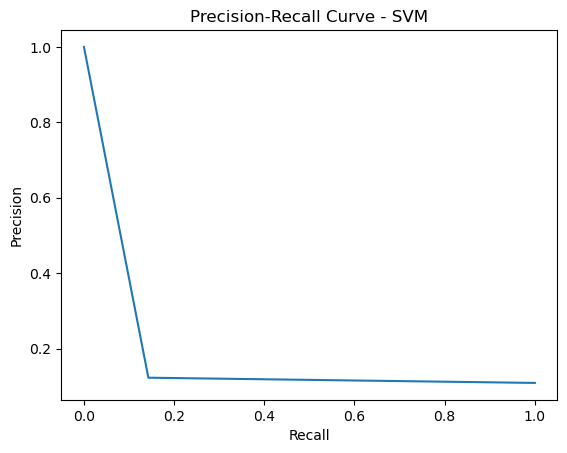

In [564]:
from sklearn.metrics import precision_recall_curve

# Calcular los valores necesarios para las curvas Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_linear)

# Graficar las curvas Precision-Recall
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (63,) and arg 3 with shape (20,).

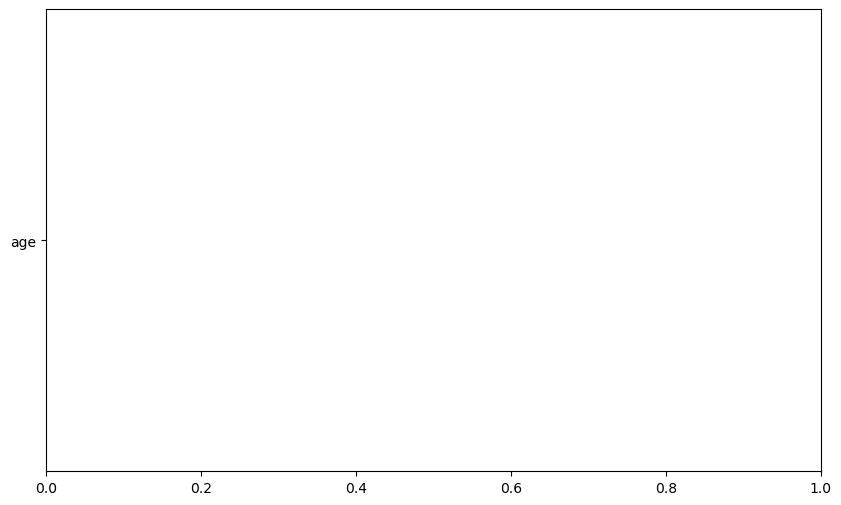

In [566]:
# Si estás utilizando un modelo SVM lineal, puedes obtener los coeficientes de las características
if best_model_linear.kernel == 'linear':
    coeficients = best_model_linear.coef_.flatten()
    feature_names = X_train.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coeficients)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance - SVM (Linear Kernel)')
    plt.show()
else:
    print("No se puede obtener la importancia de las características para un SVM no lineal.")


In [525]:
# Obtener las instancias en las que el modelo comete errores
incorrect_predictions = X_test.loc[y_test != y_pred_linear]

# Plotear un histograma de alguna característica específica para identificar patrones de error
plt.hist(incorrect_predictions['y'], bins=20)
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Histogram of Incorrect Predictions - SVM')
plt.show()


KeyError: 'y'

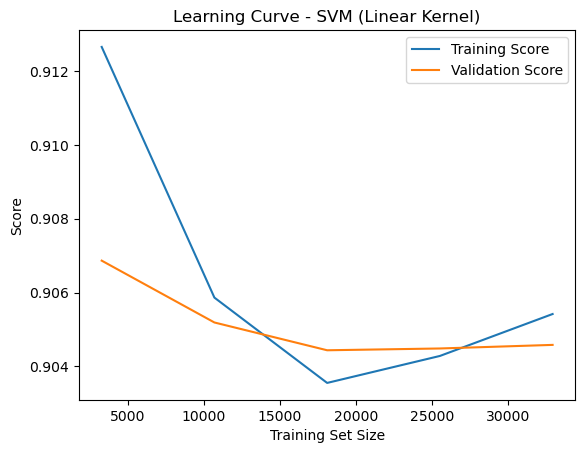

In [524]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model_linear, X_train_scaled, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - SVM (Linear Kernel)')
plt.legend()
plt.show()


## --------------------Graficos Árboles de Decisión--------------------

In [541]:
# Obtener el mejor modelo para el kernel lineal después de que la búsqueda de cuadrícula haya sido ajustada
best_model = grid_linear.best_estimator_

# Calcular la puntuación de decisión del modelo
y_scores = best_model.decision_function(X_test_encoded)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

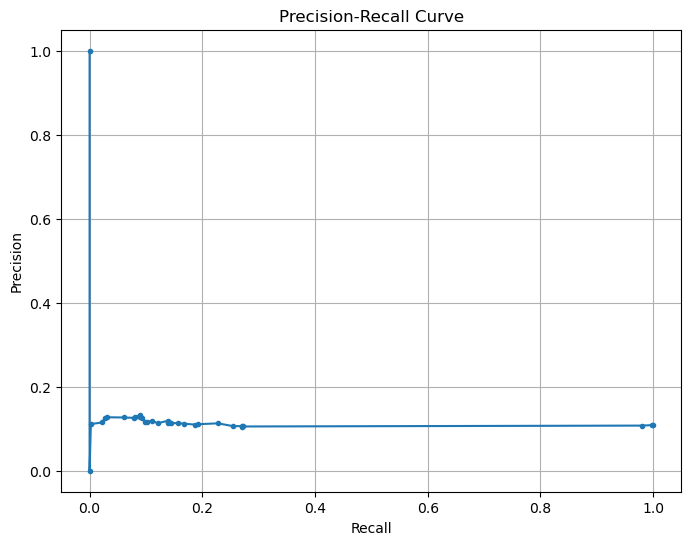

In [542]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# Obtener las probabilidades de predicción del modelo
y_scores = best_dt_model.predict_proba(X_test_encoded)[:, 1]

# Calcular los valores necesarios para la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plotear la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


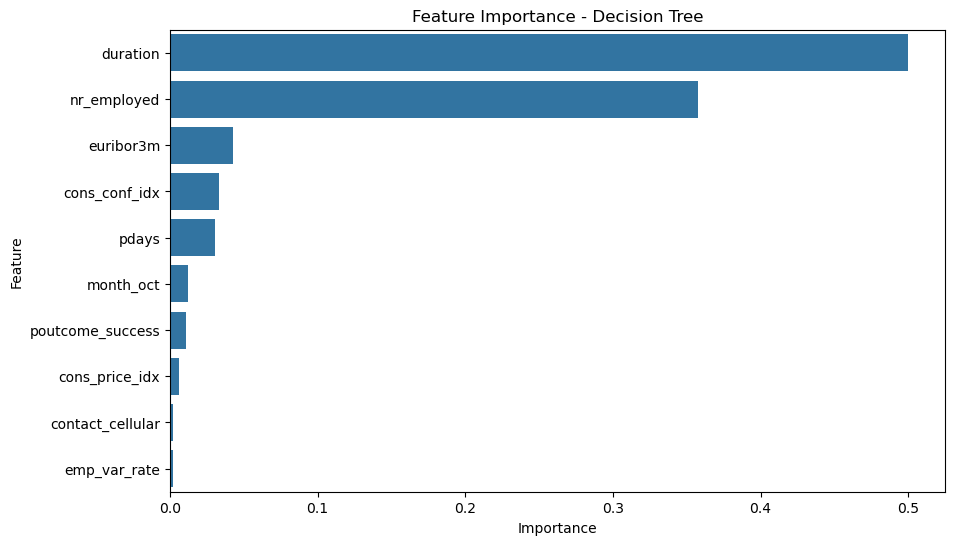

In [543]:
# Obtener la importancia de las características del mejor modelo
feature_importances = best_dt_model.feature_importances_

# Crear un DataFrame para mejor visualización
feature_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10])
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [544]:
# Obtener las instancias en las que el modelo comete errores
incorrect_predictions = X_test_encoded.loc[y_test != y_pred]

# Plotear un histograma de alguna característica específica para identificar patrones de error
plt.hist(incorrect_predictions['feature_of_interest'], bins=20)
plt.xlabel('Feature of Interest')
plt.ylabel('Frequency')
plt.title('Histogram of Incorrect Predictions - Decision Tree')
plt.show()


KeyError: 'feature_of_interest'

In [545]:
from sklearn.model_selection import learning_curve

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_encoded, y_train, cv=5, scoring='accuracy')

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve - Decision Tree')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()




NameError: name 'best_model' is not defined

## --------------------Graficos Bosques Aleatorios (Random Forest)--------------------

In [546]:
from sklearn.metrics import plot_roc_curve

# Obtener el mejor modelo de la búsqueda de cuadrícula
best_rf_model = grid_search.best_estimator_

# Crear la curva ROC
plot_roc_curve(best_rf_model, X_test, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [551]:
from sklearn.metrics import plot_precision_recall_curve

# Crear la curva Precision-Recall
plot_precision_recall_curve(best_rf_model, X_test, y_test)
plt.title('Precision-Recall Curve - Random Forest')
plt.show()


ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

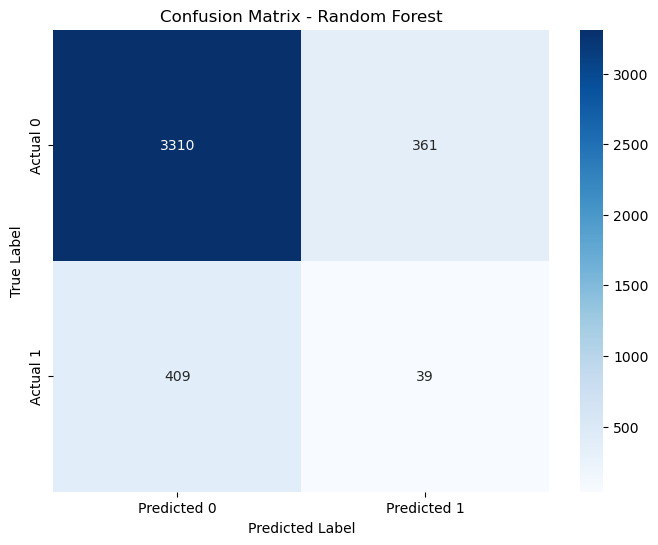

In [548]:
# Obtener predicciones del mejor modelo
y_pred = best_rf_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un DataFrame de la matriz de confusión para mejor visualización
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


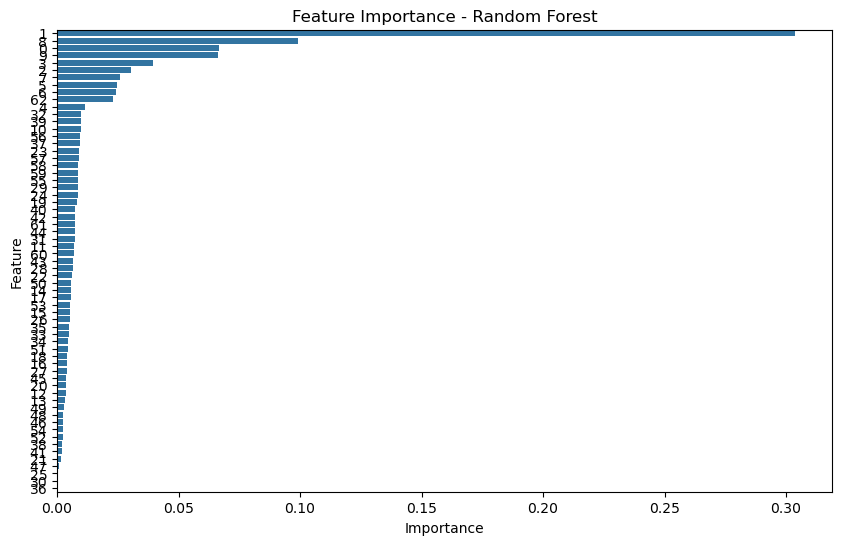

In [549]:
# Obtener la importancia de las características del mejor modelo
feature_importances = best_rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Trazar el gráfico de barras de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


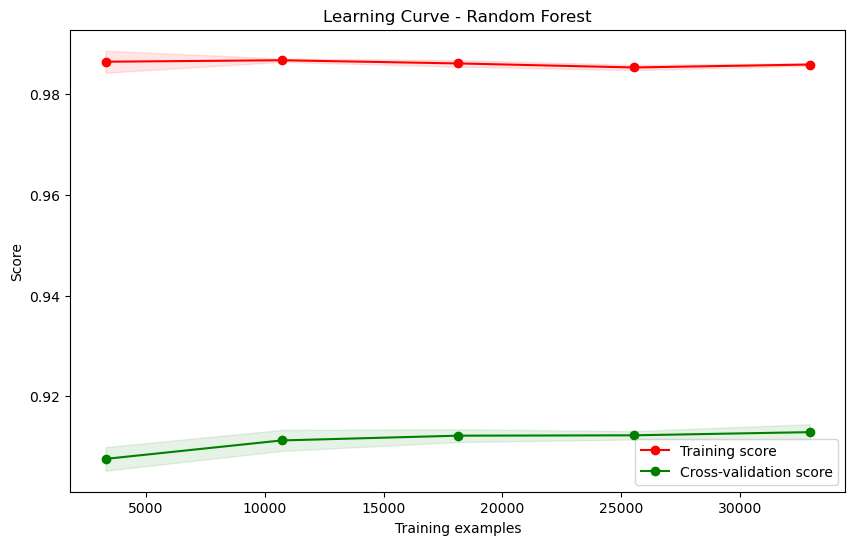

In [550]:
from sklearn.model_selection import learning_curve

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [572]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar los datos preprocesados desde los archivos CSV
df_train = pd.read_csv("credit-train.csv")
df_test = pd.read_csv("credit-test.csv")

# Dividir los datos en características (X) y variable objetivo (y)
X_train = df_train.drop(columns=['y'])
y_train = df_train['y']
X_test = df_test.drop(columns=['y'])  # Modificar el nombre de la columna aquí
y_test = df_test['y']  # Modificar el nombre de la columna aquí


# Codificación one-hot para las columnas categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train.select_dtypes(include=['object'])))
X_test_encoded = pd.DataFrame(encoder.transform(X_test.select_dtypes(include=['object'])))

# Escalado de características
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64'])))
X_test_scaled = pd.DataFrame(scaler.transform(X_test.select_dtypes(include=['int64', 'float64'])))

# Combinar características codificadas y escaladas
X_train_processed = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_processed = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Inicializar y entrenar modelos
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train_processed, y_train)
    print(f"Training of {name} model is completed.")

# Evaluar modelos
for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Model Accuracy: {accuracy}")
    print(f"Classification Report for {name} Model:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name} Model:")
    print(confusion_matrix(y_test, y_pred))


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'